In [1]:
pip install neo4j

Note: you may need to restart the kernel to use updated packages.


In [2]:
from neo4j import GraphDatabase

In [3]:
URI = "bolt://localhost:7687"
AUTH = ("neo4j", "12345678")

In [4]:
driver = GraphDatabase.driver(uri=URI , auth=AUTH)

In [5]:
session = driver.session()

In [6]:
q1= '''// load movies
// This is an initialization script for the movie graph.
// Run it only once. ;)
// Have you run it twice? Use `MATCH (n) WHERE (n:Person OR n:Movie) DETACH DELETE n` to start over.
CREATE (TheMatrix:Movie {title:'The Matrix', released:1999, tagline:'Welcome to the Real World'})
CREATE (Keanu:Person {name:'Keanu Reeves', born:1964})
CREATE (Carrie:Person {name:'Carrie-Anne Moss', born:1967})
CREATE (Laurence:Person {name:'Laurence Fishburne', born:1961})
CREATE (Hugo:Person {name:'Hugo Weaving', born:1960})
CREATE (AndyW:Person {name:'Andy Wachowski', born:1967})
CREATE (LanaW:Person {name:'Lana Wachowski', born:1965})
CREATE (JoelS:Person {name:'Joel Silver', born:1952})
CREATE
  (Keanu)-[:ACTED_IN {roles:['Neo']}]->(TheMatrix),
  (Carrie)-[:ACTED_IN {roles:['Trinity']}]->(TheMatrix),
  (Laurence)-[:ACTED_IN {roles:['Morpheus']}]->(TheMatrix),
  (Hugo)-[:ACTED_IN {roles:['Agent Smith']}]->(TheMatrix),
  (AndyW)-[:DIRECTED]->(TheMatrix),
  (LanaW)-[:DIRECTED]->(TheMatrix),
  (JoelS)-[:PRODUCED]->(TheMatrix)
CREATE (Emil:Person {name:"Emil Eifrem", born:1978})
CREATE (Emil)-[:ACTED_IN {roles:["Emil"]}]->(TheMatrix)
CREATE (TheMatrixReloaded:Movie {title:'The Matrix Reloaded', released:2003, tagline:'Free your mind'})
CREATE
  (Keanu)-[:ACTED_IN {roles:['Neo']}]->(TheMatrixReloaded),
  (Carrie)-[:ACTED_IN {roles:['Trinity']}]->(TheMatrixReloaded),
  (Laurence)-[:ACTED_IN {roles:['Morpheus']}]->(TheMatrixReloaded),
  (Hugo)-[:ACTED_IN {roles:['Agent Smith']}]->(TheMatrixReloaded),
  (AndyW)-[:DIRECTED]->(TheMatrixReloaded),
  (LanaW)-[:DIRECTED]->(TheMatrixReloaded),
  (JoelS)-[:PRODUCED]->(TheMatrixReloaded)
CREATE (TheMatrixRevolutions:Movie {title:'The Matrix Revolutions', released:2003, tagline:'Everything that has a beginning has an end'})
CREATE
  (Keanu)-[:ACTED_IN {roles:['Neo']}]->(TheMatrixRevolutions),
  (Carrie)-[:ACTED_IN {roles:['Trinity']}]->(TheMatrixRevolutions),
  (Laurence)-[:ACTED_IN {roles:['Morpheus']}]->(TheMatrixRevolutions),
  (Hugo)-[:ACTED_IN {roles:['Agent Smith']}]->(TheMatrixRevolutions),
  (AndyW)-[:DIRECTED]->(TheMatrixRevolutions),
  (LanaW)-[:DIRECTED]->(TheMatrixRevolutions),
  (JoelS)-[:PRODUCED]->(TheMatrixRevolutions)
CREATE (TheDevilsAdvocate:Movie {title:"The Devil's Advocate", released:1997, tagline:'Evil has its winning ways'})
CREATE (Charlize:Person {name:'Charlize Theron', born:1975})
CREATE (Al:Person {name:'Al Pacino', born:1940})
CREATE (Taylor:Person {name:'Taylor Hackford', born:1944})
CREATE
  (Keanu)-[:ACTED_IN {roles:['Kevin Lomax']}]->(TheDevilsAdvocate),
  (Charlize)-[:ACTED_IN {roles:['Mary Ann Lomax']}]->(TheDevilsAdvocate),
  (Al)-[:ACTED_IN {roles:['John Milton']}]->(TheDevilsAdvocate),
  (Taylor)-[:DIRECTED]->(TheDevilsAdvocate)
CREATE (AFewGoodMen:Movie {title:"A Few Good Men", released:1992, tagline:"In the heart of the nation's capital, in a courthouse of the U.S. government, one man will stop at nothing to keep his honor, and one will stop at nothing to find the truth."})
CREATE (TomC:Person {name:'Tom Cruise', born:1962})
CREATE (JackN:Person {name:'Jack Nicholson', born:1937})
CREATE (DemiM:Person {name:'Demi Moore', born:1962})
CREATE (KevinB:Person {name:'Kevin Bacon', born:1958})
CREATE (KieferS:Person {name:'Kiefer Sutherland', born:1966})
CREATE (NoahW:Person {name:'Noah Wyle', born:1971})
CREATE (CubaG:Person {name:'Cuba Gooding Jr.', born:1968})
CREATE (KevinP:Person {name:'Kevin Pollak', born:1957})
CREATE (JTW:Person {name:'J.T. Walsh', born:1943})
CREATE (JamesM:Person {name:'James Marshall', born:1967})
CREATE (ChristopherG:Person {name:'Christopher Guest', born:1948})
CREATE (RobR:Person {name:'Rob Reiner', born:1947})
CREATE (AaronS:Person {name:'Aaron Sorkin', born:1961})
CREATE
  (TomC)-[:ACTED_IN {roles:['Lt. Daniel Kaffee']}]->(AFewGoodMen),
  (JackN)-[:ACTED_IN {roles:['Col. Nathan R. Jessup']}]->(AFewGoodMen),
  (DemiM)-[:ACTED_IN {roles:['Lt. Cdr. JoAnne Galloway']}]->(AFewGoodMen),
  (KevinB)-[:ACTED_IN {roles:['Capt. Jack Ross']}]->(AFewGoodMen),
  (KieferS)-[:ACTED_IN {roles:['Lt. Jonathan Kendrick']}]->(AFewGoodMen),
  (NoahW)-[:ACTED_IN {roles:['Cpl. Jeffrey Barnes']}]->(AFewGoodMen),
  (CubaG)-[:ACTED_IN {roles:['Cpl. Carl Hammaker']}]->(AFewGoodMen),
  (KevinP)-[:ACTED_IN {roles:['Lt. Sam Weinberg']}]->(AFewGoodMen),
  (JTW)-[:ACTED_IN {roles:['Lt. Col. Matthew Andrew Markinson']}]->(AFewGoodMen),
  (JamesM)-[:ACTED_IN {roles:['Pfc. Louden Downey']}]->(AFewGoodMen),
  (ChristopherG)-[:ACTED_IN {roles:['Dr. Stone']}]->(AFewGoodMen),
  (AaronS)-[:ACTED_IN {roles:['Man in Bar']}]->(AFewGoodMen),
  (RobR)-[:DIRECTED]->(AFewGoodMen),
  (AaronS)-[:WROTE]->(AFewGoodMen)
CREATE (TopGun:Movie {title:"Top Gun", released:1986, tagline:'I feel the need, the need for speed.'})
CREATE (KellyM:Person {name:'Kelly McGillis', born:1957})
CREATE (ValK:Person {name:'Val Kilmer', born:1959})
CREATE (AnthonyE:Person {name:'Anthony Edwards', born:1962})
CREATE (TomS:Person {name:'Tom Skerritt', born:1933})
CREATE (MegR:Person {name:'Meg Ryan', born:1961})
CREATE (TonyS:Person {name:'Tony Scott', born:1944})
CREATE (JimC:Person {name:'Jim Cash', born:1941})
CREATE
  (TomC)-[:ACTED_IN {roles:['Maverick']}]->(TopGun),
  (KellyM)-[:ACTED_IN {roles:['Charlie']}]->(TopGun),
  (ValK)-[:ACTED_IN {roles:['Iceman']}]->(TopGun),
  (AnthonyE)-[:ACTED_IN {roles:['Goose']}]->(TopGun),
  (TomS)-[:ACTED_IN {roles:['Viper']}]->(TopGun),
  (MegR)-[:ACTED_IN {roles:['Carole']}]->(TopGun),
  (TonyS)-[:DIRECTED]->(TopGun),
  (JimC)-[:WROTE]->(TopGun)
CREATE (JerryMaguire:Movie {title:'Jerry Maguire', released:2000, tagline:'The rest of his life begins now.'})
CREATE (ReneeZ:Person {name:'Renee Zellweger', born:1969})
CREATE (KellyP:Person {name:'Kelly Preston', born:1962})
CREATE (JerryO:Person {name:"Jerry O'Connell", born:1974})
CREATE (JayM:Person {name:'Jay Mohr', born:1970})
CREATE (BonnieH:Person {name:'Bonnie Hunt', born:1961})
CREATE (ReginaK:Person {name:'Regina King', born:1971})
CREATE (JonathanL:Person {name:'Jonathan Lipnicki', born:1996})
CREATE (CameronC:Person {name:'Cameron Crowe', born:1957})
CREATE
  (TomC)-[:ACTED_IN {roles:['Jerry Maguire']}]->(JerryMaguire),
  (CubaG)-[:ACTED_IN {roles:['Rod Tidwell']}]->(JerryMaguire),
  (ReneeZ)-[:ACTED_IN {roles:['Dorothy Boyd']}]->(JerryMaguire),
  (KellyP)-[:ACTED_IN {roles:['Avery Bishop']}]->(JerryMaguire),
  (JerryO)-[:ACTED_IN {roles:['Frank Cushman']}]->(JerryMaguire),
  (JayM)-[:ACTED_IN {roles:['Bob Sugar']}]->(JerryMaguire),
  (BonnieH)-[:ACTED_IN {roles:['Laurel Boyd']}]->(JerryMaguire),
  (ReginaK)-[:ACTED_IN {roles:['Marcee Tidwell']}]->(JerryMaguire),
  (JonathanL)-[:ACTED_IN {roles:['Ray Boyd']}]->(JerryMaguire),
  (CameronC)-[:DIRECTED]->(JerryMaguire),
  (CameronC)-[:PRODUCED]->(JerryMaguire),
  (CameronC)-[:WROTE]->(JerryMaguire)
CREATE (StandByMe:Movie {title:"Stand By Me", released:1986, tagline:"For some, it's the last real taste of innocence, and the first real taste of life. But for everyone, it's the time that memories are made of."})
CREATE (RiverP:Person {name:'River Phoenix', born:1970})
CREATE (CoreyF:Person {name:'Corey Feldman', born:1971})
CREATE (WilW:Person {name:'Wil Wheaton', born:1972})
CREATE (JohnC:Person {name:'John Cusack', born:1966})
CREATE (MarshallB:Person {name:'Marshall Bell', born:1942})
CREATE
  (WilW)-[:ACTED_IN {roles:['Gordie Lachance']}]->(StandByMe),
  (RiverP)-[:ACTED_IN {roles:['Chris Chambers']}]->(StandByMe),
  (JerryO)-[:ACTED_IN {roles:['Vern Tessio']}]->(StandByMe),
  (CoreyF)-[:ACTED_IN {roles:['Teddy Duchamp']}]->(StandByMe),
  (JohnC)-[:ACTED_IN {roles:['Denny Lachance']}]->(StandByMe),
  (KieferS)-[:ACTED_IN {roles:['Ace Merrill']}]->(StandByMe),
  (MarshallB)-[:ACTED_IN {roles:['Mr. Lachance']}]->(StandByMe),
  (RobR)-[:DIRECTED]->(StandByMe)
CREATE (AsGoodAsItGets:Movie {title:'As Good as It Gets', released:1997, tagline:'A comedy from the heart that goes for the throat.'})
CREATE (HelenH:Person {name:'Helen Hunt', born:1963})
CREATE (GregK:Person {name:'Greg Kinnear', born:1963})
CREATE (JamesB:Person {name:'James L. Brooks', born:1940})
CREATE
  (JackN)-[:ACTED_IN {roles:['Melvin Udall']}]->(AsGoodAsItGets),
  (HelenH)-[:ACTED_IN {roles:['Carol Connelly']}]->(AsGoodAsItGets),
  (GregK)-[:ACTED_IN {roles:['Simon Bishop']}]->(AsGoodAsItGets),
  (CubaG)-[:ACTED_IN {roles:['Frank Sachs']}]->(AsGoodAsItGets),
  (JamesB)-[:DIRECTED]->(AsGoodAsItGets)
CREATE (WhatDreamsMayCome:Movie {title:'What Dreams May Come', released:1998, tagline:'After life there is more. The end is just the beginning.'})
CREATE (AnnabellaS:Person {name:'Annabella Sciorra', born:1960})
CREATE (MaxS:Person {name:'Max von Sydow', born:1929})
CREATE (WernerH:Person {name:'Werner Herzog', born:1942})
CREATE (Robin:Person {name:'Robin Williams', born:1951})
CREATE (VincentW:Person {name:'Vincent Ward', born:1956})
CREATE
  (Robin)-[:ACTED_IN {roles:['Chris Nielsen']}]->(WhatDreamsMayCome),
  (CubaG)-[:ACTED_IN {roles:['Albert Lewis']}]->(WhatDreamsMayCome),
  (AnnabellaS)-[:ACTED_IN {roles:['Annie Collins-Nielsen']}]->(WhatDreamsMayCome),
  (MaxS)-[:ACTED_IN {roles:['The Tracker']}]->(WhatDreamsMayCome),
  (WernerH)-[:ACTED_IN {roles:['The Face']}]->(WhatDreamsMayCome),
  (VincentW)-[:DIRECTED]->(WhatDreamsMayCome)
CREATE (SnowFallingonCedars:Movie {title:'Snow Falling on Cedars', released:1999, tagline:'First loves last. Forever.'})
CREATE (EthanH:Person {name:'Ethan Hawke', born:1970})
CREATE (RickY:Person {name:'Rick Yune', born:1971})
CREATE (JamesC:Person {name:'James Cromwell', born:1940})
CREATE (ScottH:Person {name:'Scott Hicks', born:1953})
CREATE
  (EthanH)-[:ACTED_IN {roles:['Ishmael Chambers']}]->(SnowFallingonCedars),
  (RickY)-[:ACTED_IN {roles:['Kazuo Miyamoto']}]->(SnowFallingonCedars),
  (MaxS)-[:ACTED_IN {roles:['Nels Gudmundsson']}]->(SnowFallingonCedars),
  (JamesC)-[:ACTED_IN {roles:['Judge Fielding']}]->(SnowFallingonCedars),
  (ScottH)-[:DIRECTED]->(SnowFallingonCedars)
CREATE (YouveGotMail:Movie {title:"You've Got Mail", released:1998, tagline:'At odds in life... in love on-line.'})
CREATE (ParkerP:Person {name:'Parker Posey', born:1968})
CREATE (DaveC:Person {name:'Dave Chappelle', born:1973})
CREATE (SteveZ:Person {name:'Steve Zahn', born:1967})
CREATE (TomH:Person {name:'Tom Hanks', born:1956})
CREATE (NoraE:Person {name:'Nora Ephron', born:1941})
CREATE
  (TomH)-[:ACTED_IN {roles:['Joe Fox']}]->(YouveGotMail),
  (MegR)-[:ACTED_IN {roles:['Kathleen Kelly']}]->(YouveGotMail),
  (GregK)-[:ACTED_IN {roles:['Frank Navasky']}]->(YouveGotMail),
  (ParkerP)-[:ACTED_IN {roles:['Patricia Eden']}]->(YouveGotMail),
  (DaveC)-[:ACTED_IN {roles:['Kevin Jackson']}]->(YouveGotMail),
  (SteveZ)-[:ACTED_IN {roles:['George Pappas']}]->(YouveGotMail),
  (NoraE)-[:DIRECTED]->(YouveGotMail)
CREATE (SleeplessInSeattle:Movie {title:'Sleepless in Seattle', released:1993, tagline:'What if someone you never met, someone you never saw, someone you never knew was the only someone for you?'})
CREATE (RitaW:Person {name:'Rita Wilson', born:1956})
CREATE (BillPull:Person {name:'Bill Pullman', born:1953})
CREATE (VictorG:Person {name:'Victor Garber', born:1949})
CREATE (RosieO:Person {name:"Rosie O'Donnell", born:1962})
CREATE
  (TomH)-[:ACTED_IN {roles:['Sam Baldwin']}]->(SleeplessInSeattle),
  (MegR)-[:ACTED_IN {roles:['Annie Reed']}]->(SleeplessInSeattle),
  (RitaW)-[:ACTED_IN {roles:['Suzy']}]->(SleeplessInSeattle),
  (BillPull)-[:ACTED_IN {roles:['Walter']}]->(SleeplessInSeattle),
  (VictorG)-[:ACTED_IN {roles:['Greg']}]->(SleeplessInSeattle),
  (RosieO)-[:ACTED_IN {roles:['Becky']}]->(SleeplessInSeattle),
  (NoraE)-[:DIRECTED]->(SleeplessInSeattle)
CREATE (JoeVersustheVolcano:Movie {title:'Joe Versus the Volcano', released:1990, tagline:'A story of love, lava and burning desire.'})
CREATE (JohnS:Person {name:'John Patrick Stanley', born:1950})
CREATE (Nathan:Person {name:'Nathan Lane', born:1956})
CREATE
  (TomH)-[:ACTED_IN {roles:['Joe Banks']}]->(JoeVersustheVolcano),
  (MegR)-[:ACTED_IN {roles:['DeDe', 'Angelica Graynamore', 'Patricia Graynamore']}]->(JoeVersustheVolcano),
  (Nathan)-[:ACTED_IN {roles:['Baw']}]->(JoeVersustheVolcano),
  (JohnS)-[:DIRECTED]->(JoeVersustheVolcano)
CREATE (WhenHarryMetSally:Movie {title:'When Harry Met Sally', released:1998, tagline:'At odds in life... in love on-line.'})
CREATE (BillyC:Person {name:'Billy Crystal', born:1948})
CREATE (CarrieF:Person {name:'Carrie Fisher', born:1956})
CREATE (BrunoK:Person {name:'Bruno Kirby', born:1949})
CREATE
  (BillyC)-[:ACTED_IN {roles:['Harry Burns']}]->(WhenHarryMetSally),
  (MegR)-[:ACTED_IN {roles:['Sally Albright']}]->(WhenHarryMetSally),
  (CarrieF)-[:ACTED_IN {roles:['Marie']}]->(WhenHarryMetSally),
  (BrunoK)-[:ACTED_IN {roles:['Jess']}]->(WhenHarryMetSally),
  (RobR)-[:DIRECTED]->(WhenHarryMetSally),
  (RobR)-[:PRODUCED]->(WhenHarryMetSally),
  (NoraE)-[:PRODUCED]->(WhenHarryMetSally),
  (NoraE)-[:WROTE]->(WhenHarryMetSally)
CREATE (ThatThingYouDo:Movie {title:'That Thing You Do', released:1996, tagline:'In every life there comes a time when that thing you dream becomes that thing you do'})
CREATE (LivT:Person {name:'Liv Tyler', born:1977})
CREATE
  (TomH)-[:ACTED_IN {roles:['Mr. White']}]->(ThatThingYouDo),
  (LivT)-[:ACTED_IN {roles:['Faye Dolan']}]->(ThatThingYouDo),
  (Charlize)-[:ACTED_IN {roles:['Tina']}]->(ThatThingYouDo),
  (TomH)-[:DIRECTED]->(ThatThingYouDo)
CREATE (TheReplacements:Movie {title:'The Replacements', released:2000, tagline:'Pain heals, Chicks dig scars... Glory lasts forever'})
CREATE (Brooke:Person {name:'Brooke Langton', born:1970})
CREATE (Gene:Person {name:'Gene Hackman', born:1930})
CREATE (Orlando:Person {name:'Orlando Jones', born:1968})
CREATE (Howard:Person {name:'Howard Deutch', born:1950})
CREATE
  (Keanu)-[:ACTED_IN {roles:['Shane Falco']}]->(TheReplacements),
  (Brooke)-[:ACTED_IN {roles:['Annabelle Farrell']}]->(TheReplacements),
  (Gene)-[:ACTED_IN {roles:['Jimmy McGinty']}]->(TheReplacements),
  (Orlando)-[:ACTED_IN {roles:['Clifford Franklin']}]->(TheReplacements),
  (Howard)-[:DIRECTED]->(TheReplacements)
CREATE (RescueDawn:Movie {title:'RescueDawn', released:2006, tagline:"Based on the extraordinary true story of one man's fight for freedom"})
CREATE (ChristianB:Person {name:'Christian Bale', born:1974})
CREATE (ZachG:Person {name:'Zach Grenier', born:1954})
CREATE
  (MarshallB)-[:ACTED_IN {roles:['Admiral']}]->(RescueDawn),
  (ChristianB)-[:ACTED_IN {roles:['Dieter Dengler']}]->(RescueDawn),
  (ZachG)-[:ACTED_IN {roles:['Squad Leader']}]->(RescueDawn),
  (SteveZ)-[:ACTED_IN {roles:['Duane']}]->(RescueDawn),
  (WernerH)-[:DIRECTED]->(RescueDawn)
CREATE (TheBirdcage:Movie {title:'The Birdcage', released:1996, tagline:'Come as you are'})
CREATE (MikeN:Person {name:'Mike Nichols', born:1931})
CREATE
  (Robin)-[:ACTED_IN {roles:['Armand Goldman']}]->(TheBirdcage),
  (Nathan)-[:ACTED_IN {roles:['Albert Goldman']}]->(TheBirdcage),
  (Gene)-[:ACTED_IN {roles:['Sen. Kevin Keeley']}]->(TheBirdcage),
  (MikeN)-[:DIRECTED]->(TheBirdcage)
CREATE (Unforgiven:Movie {title:'Unforgiven', released:1992, tagline:"It's a hell of a thing, killing a man"})
CREATE (RichardH:Person {name:'Richard Harris', born:1930})
CREATE (ClintE:Person {name:'Clint Eastwood', born:1930})
CREATE
  (RichardH)-[:ACTED_IN {roles:['English Bob']}]->(Unforgiven),
  (ClintE)-[:ACTED_IN {roles:['Bill Munny']}]->(Unforgiven),
  (Gene)-[:ACTED_IN {roles:['Little Bill Daggett']}]->(Unforgiven),
  (ClintE)-[:DIRECTED]->(Unforgiven)
CREATE (JohnnyMnemonic:Movie {title:'Johnny Mnemonic', released:1995, tagline:'The hottest data on earth. In the coolest head in town'})
CREATE (Takeshi:Person {name:'Takeshi Kitano', born:1947})
CREATE (Dina:Person {name:'Dina Meyer', born:1968})
CREATE (IceT:Person {name:'Ice-T', born:1958})
CREATE (RobertL:Person {name:'Robert Longo', born:1953})
CREATE
  (Keanu)-[:ACTED_IN {roles:['Johnny Mnemonic']}]->(JohnnyMnemonic),
  (Takeshi)-[:ACTED_IN {roles:['Takahashi']}]->(JohnnyMnemonic),
  (Dina)-[:ACTED_IN {roles:['Jane']}]->(JohnnyMnemonic),
  (IceT)-[:ACTED_IN {roles:['J-Bone']}]->(JohnnyMnemonic),
  (RobertL)-[:DIRECTED]->(JohnnyMnemonic)
CREATE (CloudAtlas:Movie {title:'Cloud Atlas', released:2012, tagline:'Everything is connected'})
CREATE (HalleB:Person {name:'Halle Berry', born:1966})
CREATE (JimB:Person {name:'Jim Broadbent', born:1949})
CREATE (TomT:Person {name:'Tom Tykwer', born:1965})
CREATE
  (TomH)-[:ACTED_IN {roles:['Zachry', 'Dr. Henry Goose', 'Isaac Sachs', 'Dermot Hoggins']}]->(CloudAtlas),
  (Hugo)-[:ACTED_IN {roles:['Bill Smoke', 'Haskell Moore', 'Tadeusz Kesselring', 'Nurse Noakes', 'Boardman Mephi', 'Old Georgie']}]->(CloudAtlas),
  (HalleB)-[:ACTED_IN {roles:['Luisa Rey', 'Jocasta Ayrs', 'Ovid', 'Meronym']}]->(CloudAtlas),
  (JimB)-[:ACTED_IN {roles:['Vyvyan Ayrs', 'Captain Molyneux', 'Timothy Cavendish']}]->(CloudAtlas),
  (TomT)-[:DIRECTED]->(CloudAtlas),
  (AndyW)-[:DIRECTED]->(CloudAtlas),
  (LanaW)-[:DIRECTED]->(CloudAtlas)
CREATE (TheDaVinciCode:Movie {title:'The Da Vinci Code', released:2006, tagline:'Break The Codes'})
CREATE (IanM:Person {name:'Ian McKellen', born:1939})
CREATE (AudreyT:Person {name:'Audrey Tautou', born:1976})
CREATE (PaulB:Person {name:'Paul Bettany', born:1971})
CREATE (RonH:Person {name:'Ron Howard', born:1954})
CREATE
  (TomH)-[:ACTED_IN {roles:['Dr. Robert Langdon']}]->(TheDaVinciCode),
  (IanM)-[:ACTED_IN {roles:['Sir Leight Teabing']}]->(TheDaVinciCode),
  (AudreyT)-[:ACTED_IN {roles:['Sophie Neveu']}]->(TheDaVinciCode),
  (PaulB)-[:ACTED_IN {roles:['Silas']}]->(TheDaVinciCode),
  (RonH)-[:DIRECTED]->(TheDaVinciCode)
CREATE (VforVendetta:Movie {title:'V for Vendetta', released:2006, tagline:'Freedom! Forever!'})
CREATE (NatalieP:Person {name:'Natalie Portman', born:1981})
CREATE (StephenR:Person {name:'Stephen Rea', born:1946})
CREATE (JohnH:Person {name:'John Hurt', born:1940})
CREATE (BenM:Person {name: 'Ben Miles', born:1967})
CREATE
  (Hugo)-[:ACTED_IN {roles:['V']}]->(VforVendetta),
  (NatalieP)-[:ACTED_IN {roles:['Evey Hammond']}]->(VforVendetta),
  (StephenR)-[:ACTED_IN {roles:['Eric Finch']}]->(VforVendetta),
  (JohnH)-[:ACTED_IN {roles:['High Chancellor Adam Sutler']}]->(VforVendetta),
  (BenM)-[:ACTED_IN {roles:['Dascomb']}]->(VforVendetta),
  (JamesM)-[:DIRECTED]->(VforVendetta),
  (AndyW)-[:PRODUCED]->(VforVendetta),
  (LanaW)-[:PRODUCED]->(VforVendetta),
  (JoelS)-[:PRODUCED]->(VforVendetta),
  (AndyW)-[:WROTE]->(VforVendetta),
  (LanaW)-[:WROTE]->(VforVendetta)
CREATE (SpeedRacer:Movie {title:'Speed Racer', released:2008, tagline:'Speed has no limits'})
CREATE (EmileH:Person {name:'Emile Hirsch', born:1985})
CREATE (JohnG:Person {name:'John Goodman', born:1960})
CREATE (SusanS:Person {name:'Susan Sarandon', born:1946})
CREATE (MatthewF:Person {name:'Matthew Fox', born:1966})
CREATE (ChristinaR:Person {name:'Christina Ricci', born:1980})
CREATE (Rain:Person {name:'Rain', born:1982})
CREATE
  (EmileH)-[:ACTED_IN {roles:['Speed Racer']}]->(SpeedRacer),
  (JohnG)-[:ACTED_IN {roles:['Pops']}]->(SpeedRacer),
  (SusanS)-[:ACTED_IN {roles:['Mom']}]->(SpeedRacer),
  (MatthewF)-[:ACTED_IN {roles:['Racer X']}]->(SpeedRacer),
  (ChristinaR)-[:ACTED_IN {roles:['Trixie']}]->(SpeedRacer),
  (Rain)-[:ACTED_IN {roles:['Taejo Togokahn']}]->(SpeedRacer),
  (BenM)-[:ACTED_IN {roles:['Cass Jones']}]->(SpeedRacer),
  (AndyW)-[:DIRECTED]->(SpeedRacer),
  (LanaW)-[:DIRECTED]->(SpeedRacer),
  (AndyW)-[:WROTE]->(SpeedRacer),
  (LanaW)-[:WROTE]->(SpeedRacer),
  (JoelS)-[:PRODUCED]->(SpeedRacer)
CREATE (NinjaAssassin:Movie {title:'Ninja Assassin', released:2009, tagline:'Prepare to enter a secret world of assassins'})
CREATE (NaomieH:Person {name:'Naomie Harris'})
CREATE
  (Rain)-[:ACTED_IN {roles:['Raizo']}]->(NinjaAssassin),
  (NaomieH)-[:ACTED_IN {roles:['Mika Coretti']}]->(NinjaAssassin),
  (RickY)-[:ACTED_IN {roles:['Takeshi']}]->(NinjaAssassin),
  (BenM)-[:ACTED_IN {roles:['Ryan Maslow']}]->(NinjaAssassin),
  (JamesM)-[:DIRECTED]->(NinjaAssassin),
  (AndyW)-[:PRODUCED]->(NinjaAssassin),
  (LanaW)-[:PRODUCED]->(NinjaAssassin),
  (JoelS)-[:PRODUCED]->(NinjaAssassin)
CREATE (TheGreenMile:Movie {title:'The Green Mile', released:1999, tagline:"Walk a mile you'll never forget."})
CREATE (MichaelD:Person {name:'Michael Clarke Duncan', born:1957})
CREATE (DavidM:Person {name:'David Morse', born:1953})
CREATE (SamR:Person {name:'Sam Rockwell', born:1968})
CREATE (GaryS:Person {name:'Gary Sinise', born:1955})
CREATE (PatriciaC:Person {name:'Patricia Clarkson', born:1959})
CREATE (FrankD:Person {name:'Frank Darabont', born:1959})
CREATE
  (TomH)-[:ACTED_IN {roles:['Paul Edgecomb']}]->(TheGreenMile),
  (MichaelD)-[:ACTED_IN {roles:['John Coffey']}]->(TheGreenMile),
  (DavidM)-[:ACTED_IN {roles:['Brutus "Brutal" Howell']}]->(TheGreenMile),
  (BonnieH)-[:ACTED_IN {roles:['Jan Edgecomb']}]->(TheGreenMile),
  (JamesC)-[:ACTED_IN {roles:['Warden Hal Moores']}]->(TheGreenMile),
  (SamR)-[:ACTED_IN {roles:['"Wild Bill" Wharton']}]->(TheGreenMile),
  (GaryS)-[:ACTED_IN {roles:['Burt Hammersmith']}]->(TheGreenMile),
  (PatriciaC)-[:ACTED_IN {roles:['Melinda Moores']}]->(TheGreenMile),
  (FrankD)-[:DIRECTED]->(TheGreenMile)
CREATE (FrostNixon:Movie {title:'Frost/Nixon', released:2008, tagline:'400 million people were waiting for the truth.'})
CREATE (FrankL:Person {name:'Frank Langella', born:1938})
CREATE (MichaelS:Person {name:'Michael Sheen', born:1969})
CREATE (OliverP:Person {name:'Oliver Platt', born:1960})
CREATE
  (FrankL)-[:ACTED_IN {roles:['Richard Nixon']}]->(FrostNixon),
  (MichaelS)-[:ACTED_IN {roles:['David Frost']}]->(FrostNixon),
  (KevinB)-[:ACTED_IN {roles:['Jack Brennan']}]->(FrostNixon),
  (OliverP)-[:ACTED_IN {roles:['Bob Zelnick']}]->(FrostNixon),
  (SamR)-[:ACTED_IN {roles:['James Reston, Jr.']}]->(FrostNixon),
  (RonH)-[:DIRECTED]->(FrostNixon)
CREATE (Hoffa:Movie {title:'Hoffa', released:1992, tagline:"He didn't want law. He wanted justice."})
CREATE (DannyD:Person {name:'Danny DeVito', born:1944})
CREATE (JohnR:Person {name:'John C. Reilly', born:1965})
CREATE
  (JackN)-[:ACTED_IN {roles:['Hoffa']}]->(Hoffa),
  (DannyD)-[:ACTED_IN {roles:['Robert "Bobby" Ciaro']}]->(Hoffa),
  (JTW)-[:ACTED_IN {roles:['Frank Fitzsimmons']}]->(Hoffa),
  (JohnR)-[:ACTED_IN {roles:['Peter "Pete" Connelly']}]->(Hoffa),
  (DannyD)-[:DIRECTED]->(Hoffa)
CREATE (Apollo13:Movie {title:'Apollo 13', released:1995, tagline:'Houston, we have a problem.'})
CREATE (EdH:Person {name:'Ed Harris', born:1950})
CREATE (BillPax:Person {name:'Bill Paxton', born:1955})
CREATE
  (TomH)-[:ACTED_IN {roles:['Jim Lovell']}]->(Apollo13),
  (KevinB)-[:ACTED_IN {roles:['Jack Swigert']}]->(Apollo13),
  (EdH)-[:ACTED_IN {roles:['Gene Kranz']}]->(Apollo13),
  (BillPax)-[:ACTED_IN {roles:['Fred Haise']}]->(Apollo13),
  (GaryS)-[:ACTED_IN {roles:['Ken Mattingly']}]->(Apollo13),
  (RonH)-[:DIRECTED]->(Apollo13)
CREATE (Twister:Movie {title:'Twister', released:1996, tagline:"Don't Breathe. Don't Look Back."})
CREATE (PhilipH:Person {name:'Philip Seymour Hoffman', born:1967})
CREATE (JanB:Person {name:'Jan de Bont', born:1943})
CREATE
  (BillPax)-[:ACTED_IN {roles:['Bill Harding']}]->(Twister),
  (HelenH)-[:ACTED_IN {roles:['Dr. Jo Harding']}]->(Twister),
  (ZachG)-[:ACTED_IN {roles:['Eddie']}]->(Twister),
  (PhilipH)-[:ACTED_IN {roles:['Dustin "Dusty" Davis']}]->(Twister),
  (JanB)-[:DIRECTED]->(Twister)
CREATE (CastAway:Movie {title:'Cast Away', released:2000, tagline:'At the edge of the world, his journey begins.'})
CREATE (RobertZ:Person {name:'Robert Zemeckis', born:1951})
CREATE
  (TomH)-[:ACTED_IN {roles:['Chuck Noland']}]->(CastAway),
  (HelenH)-[:ACTED_IN {roles:['Kelly Frears']}]->(CastAway),
  (RobertZ)-[:DIRECTED]->(CastAway)
CREATE (OneFlewOvertheCuckoosNest:Movie {title:"One Flew Over the Cuckoo's Nest", released:1975, tagline:"If he's crazy, what does that make you?"})
CREATE (MilosF:Person {name:'Milos Forman', born:1932})
CREATE
  (JackN)-[:ACTED_IN {roles:['Randle McMurphy']}]->(OneFlewOvertheCuckoosNest),
  (DannyD)-[:ACTED_IN {roles:['Martini']}]->(OneFlewOvertheCuckoosNest),
  (MilosF)-[:DIRECTED]->(OneFlewOvertheCuckoosNest)
CREATE (SomethingsGottaGive:Movie {title:"Something's Gotta Give", released:2003})
CREATE (DianeK:Person {name:'Diane Keaton', born:1946})
CREATE (NancyM:Person {name:'Nancy Meyers', born:1949})
CREATE
  (JackN)-[:ACTED_IN {roles:['Harry Sanborn']}]->(SomethingsGottaGive),
  (DianeK)-[:ACTED_IN {roles:['Erica Barry']}]->(SomethingsGottaGive),
  (Keanu)-[:ACTED_IN {roles:['Julian Mercer']}]->(SomethingsGottaGive),
  (NancyM)-[:DIRECTED]->(SomethingsGottaGive),
  (NancyM)-[:PRODUCED]->(SomethingsGottaGive),
  (NancyM)-[:WROTE]->(SomethingsGottaGive)
CREATE (BicentennialMan:Movie {title:'Bicentennial Man', released:1999, tagline:"One robot's 200 year journey to become an ordinary man."})
CREATE (ChrisC:Person {name:'Chris Columbus', born:1958})
CREATE
  (Robin)-[:ACTED_IN {roles:['Andrew Marin']}]->(BicentennialMan),
  (OliverP)-[:ACTED_IN {roles:['Rupert Burns']}]->(BicentennialMan),
  (ChrisC)-[:DIRECTED]->(BicentennialMan)
CREATE (CharlieWilsonsWar:Movie {title:"Charlie Wilson's War", released:2007, tagline:"A stiff drink. A little mascara. A lot of nerve. Who said they couldn't bring down the Soviet empire."})
CREATE (JuliaR:Person {name:'Julia Roberts', born:1967})
CREATE
  (TomH)-[:ACTED_IN {roles:['Rep. Charlie Wilson']}]->(CharlieWilsonsWar),
  (JuliaR)-[:ACTED_IN {roles:['Joanne Herring']}]->(CharlieWilsonsWar),
  (PhilipH)-[:ACTED_IN {roles:['Gust Avrakotos']}]->(CharlieWilsonsWar),
  (MikeN)-[:DIRECTED]->(CharlieWilsonsWar)
CREATE (ThePolarExpress:Movie {title:'The Polar Express', released:2004, tagline:'This Holiday Season… Believe'})
CREATE
  (TomH)-[:ACTED_IN {roles:['Hero Boy', 'Father', 'Conductor', 'Hobo', 'Scrooge', 'Santa Claus']}]->(ThePolarExpress),
  (RobertZ)-[:DIRECTED]->(ThePolarExpress)
CREATE (ALeagueofTheirOwn:Movie {title:'A League of Their Own', released:1992, tagline:'Once in a lifetime you get a chance to do something different.'})
CREATE (Madonna:Person {name:'Madonna', born:1954})
CREATE (GeenaD:Person {name:'Geena Davis', born:1956})
CREATE (LoriP:Person {name:'Lori Petty', born:1963})
CREATE (PennyM:Person {name:'Penny Marshall', born:1943})
CREATE
  (TomH)-[:ACTED_IN {roles:['Jimmy Dugan']}]->(ALeagueofTheirOwn),
  (GeenaD)-[:ACTED_IN {roles:['Dottie Hinson']}]->(ALeagueofTheirOwn),
  (LoriP)-[:ACTED_IN {roles:['Kit Keller']}]->(ALeagueofTheirOwn),
  (RosieO)-[:ACTED_IN {roles:['Doris Murphy']}]->(ALeagueofTheirOwn),
  (Madonna)-[:ACTED_IN {roles:['"All the Way" Mae Mordabito']}]->(ALeagueofTheirOwn),
  (BillPax)-[:ACTED_IN {roles:['Bob Hinson']}]->(ALeagueofTheirOwn),
  (PennyM)-[:DIRECTED]->(ALeagueofTheirOwn)
CREATE (PaulBlythe:Person {name:'Paul Blythe'})
CREATE (AngelaScope:Person {name:'Angela Scope'})
CREATE (JessicaThompson:Person {name:'Jessica Thompson'})
CREATE (JamesThompson:Person {name:'James Thompson'})
CREATE
  (JamesThompson)-[:FOLLOWS]->(JessicaThompson),
  (AngelaScope)-[:FOLLOWS]->(JessicaThompson),
  (PaulBlythe)-[:FOLLOWS]->(AngelaScope)
CREATE
  (JessicaThompson)-[:REVIEWED {summary:'An amazing journey', rating:95}]->(CloudAtlas),
  (JessicaThompson)-[:REVIEWED {summary:'Silly, but fun', rating:65}]->(TheReplacements),
  (JamesThompson)-[:REVIEWED {summary:'The coolest football movie ever', rating:100}]->(TheReplacements),
  (AngelaScope)-[:REVIEWED {summary:'Pretty funny at times', rating:62}]->(TheReplacements),
  (JessicaThompson)-[:REVIEWED {summary:'Dark, but compelling', rating:85}]->(Unforgiven),
  (JessicaThompson)-[:REVIEWED {summary:"Slapstick redeemed only by the Robin Williams and Gene Hackman's stellar performances", rating:45}]->(TheBirdcage),
  (JessicaThompson)-[:REVIEWED {summary:'A solid romp', rating:68}]->(TheDaVinciCode),
  (JamesThompson)-[:REVIEWED {summary:'Fun, but a little far fetched', rating:65}]->(TheDaVinciCode)
// Parasite movie and cast
CREATE (Parasite:Movie {title:'Parasite', released:2019, tagline:'Act like you own the place'})
CREATE (KangHoSong:Person {name:'Kang-ho Song'})
CREATE (SunKyunLee:Person {name:'Sun-kyun Lee'})
CREATE (YeoJeongJo:Person {name:'Yeo-jeong Jo'})
CREATE (WooSikChoi:Person {name:'Woo-sik Choi'})
CREATE (SoDamPark:Person  {name:'So-dam Park'})
CREATE
  (KangHoSong)-[:ACTED_IN {roles:['Ki Taek']}]->(Parasite),
  (SunKyunLee)-[:ACTED_IN {roles:['Dong Ik']}]->(Parasite),
  (YeoJeongJo)-[:ACTED_IN {roles:['Yeon Kyo']}]->(Parasite),
  (WooSikChoi)-[:ACTED_IN {roles:['Ki Woo']}]->(Parasite),
  (SoDamPark)-[:ACTED_IN {roles:['Ki Jung']}]->(Parasite)
// Joker movie and cast
CREATE (Joker:Movie {title:'Joker', released:2019, tagline:'Put on a happy face'})
CREATE (JoaquinPhoenix:Person {name:'Joaquin Phoenix'})
CREATE (RobertDeNiro:Person {name:'Robert De Niro'})
CREATE (ZazieBeetz:Person {name:'Zazie Beetz'})
CREATE
  (JoaquinPhoenix)-[:ACTED_IN {roles:['Arthur Fleck']}]->(Joker),
  (RobertDeNiro)-[:ACTED_IN {roles:['Murray Franklin']}]->(Joker),
  (ZazieBeetz)-[:ACTED_IN {roles:['Sophie Dumond']}]->(Joker)
;'''

In [7]:
results = session.run(q1)

# basic queries


In [8]:
q2 = 'match (n) return n limit 1'

q2_ans = session.run(q2)

for i in q2_ans:
    print(i)

<Record n=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:0' labels=frozenset({'Movie'}) properties={'tagline': 'Welcome to the Real World', 'title': 'The Matrix', 'released': 1999}>>


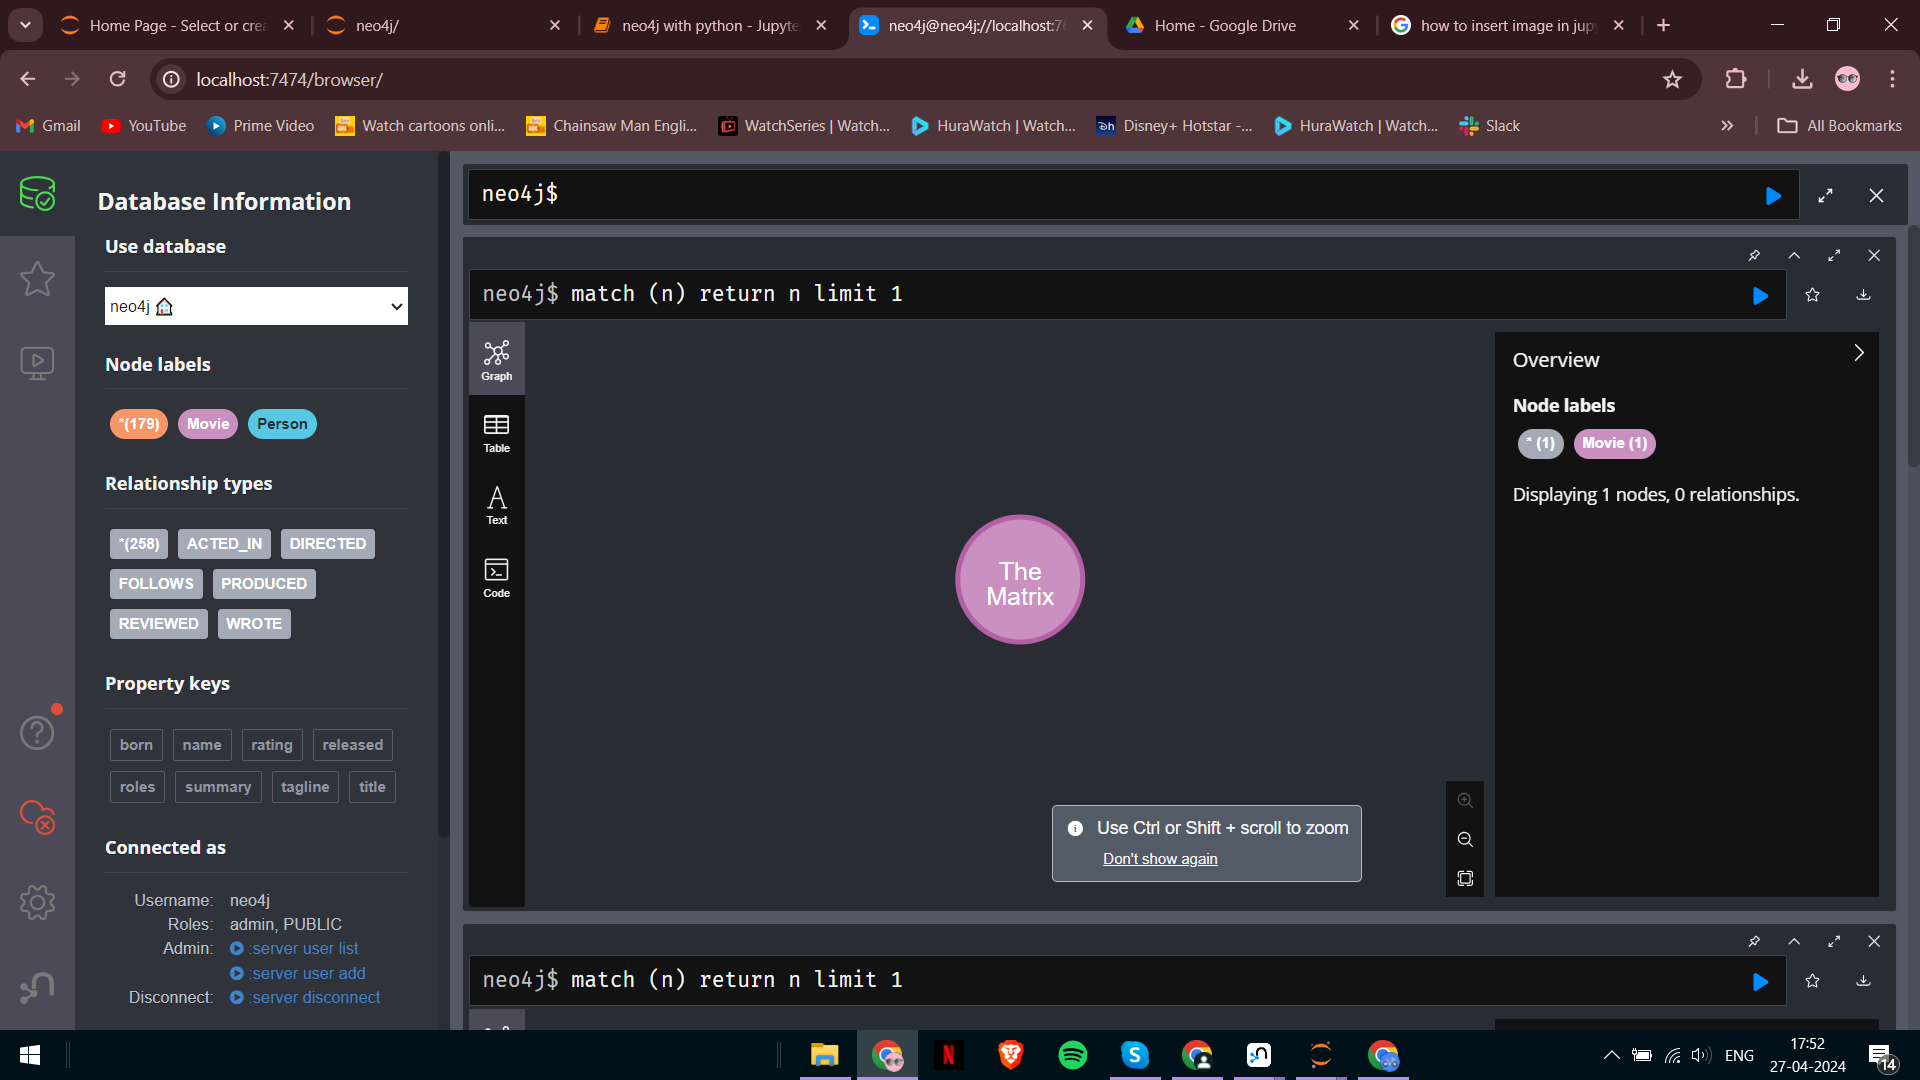

In [14]:
q3 = 'match (actor:Person)-[r:ACTED_IN]->(m1:Movie) return actor , m1 limit 10'
q3_ans = session.run(q3)
q3

for i in q3_ans:
    print(i)

<Record actor=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:8' labels=frozenset({'Person'}) properties={'born': 1978, 'name': 'Emil Eifrem'}> m1=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:0' labels=frozenset({'Movie'}) properties={'tagline': 'Welcome to the Real World', 'title': 'The Matrix', 'released': 1999}>>
<Record actor=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:4' labels=frozenset({'Person'}) properties={'born': 1960, 'name': 'Hugo Weaving'}> m1=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:0' labels=frozenset({'Movie'}) properties={'tagline': 'Welcome to the Real World', 'title': 'The Matrix', 'released': 1999}>>
<Record actor=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:3' labels=frozenset({'Person'}) properties={'born': 1961, 'name': 'Laurence Fishburne'}> m1=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:0' labels=frozenset({'Movie'}) properties={'tagline': 'Welcome to the Real World', 'title': 'The Matr

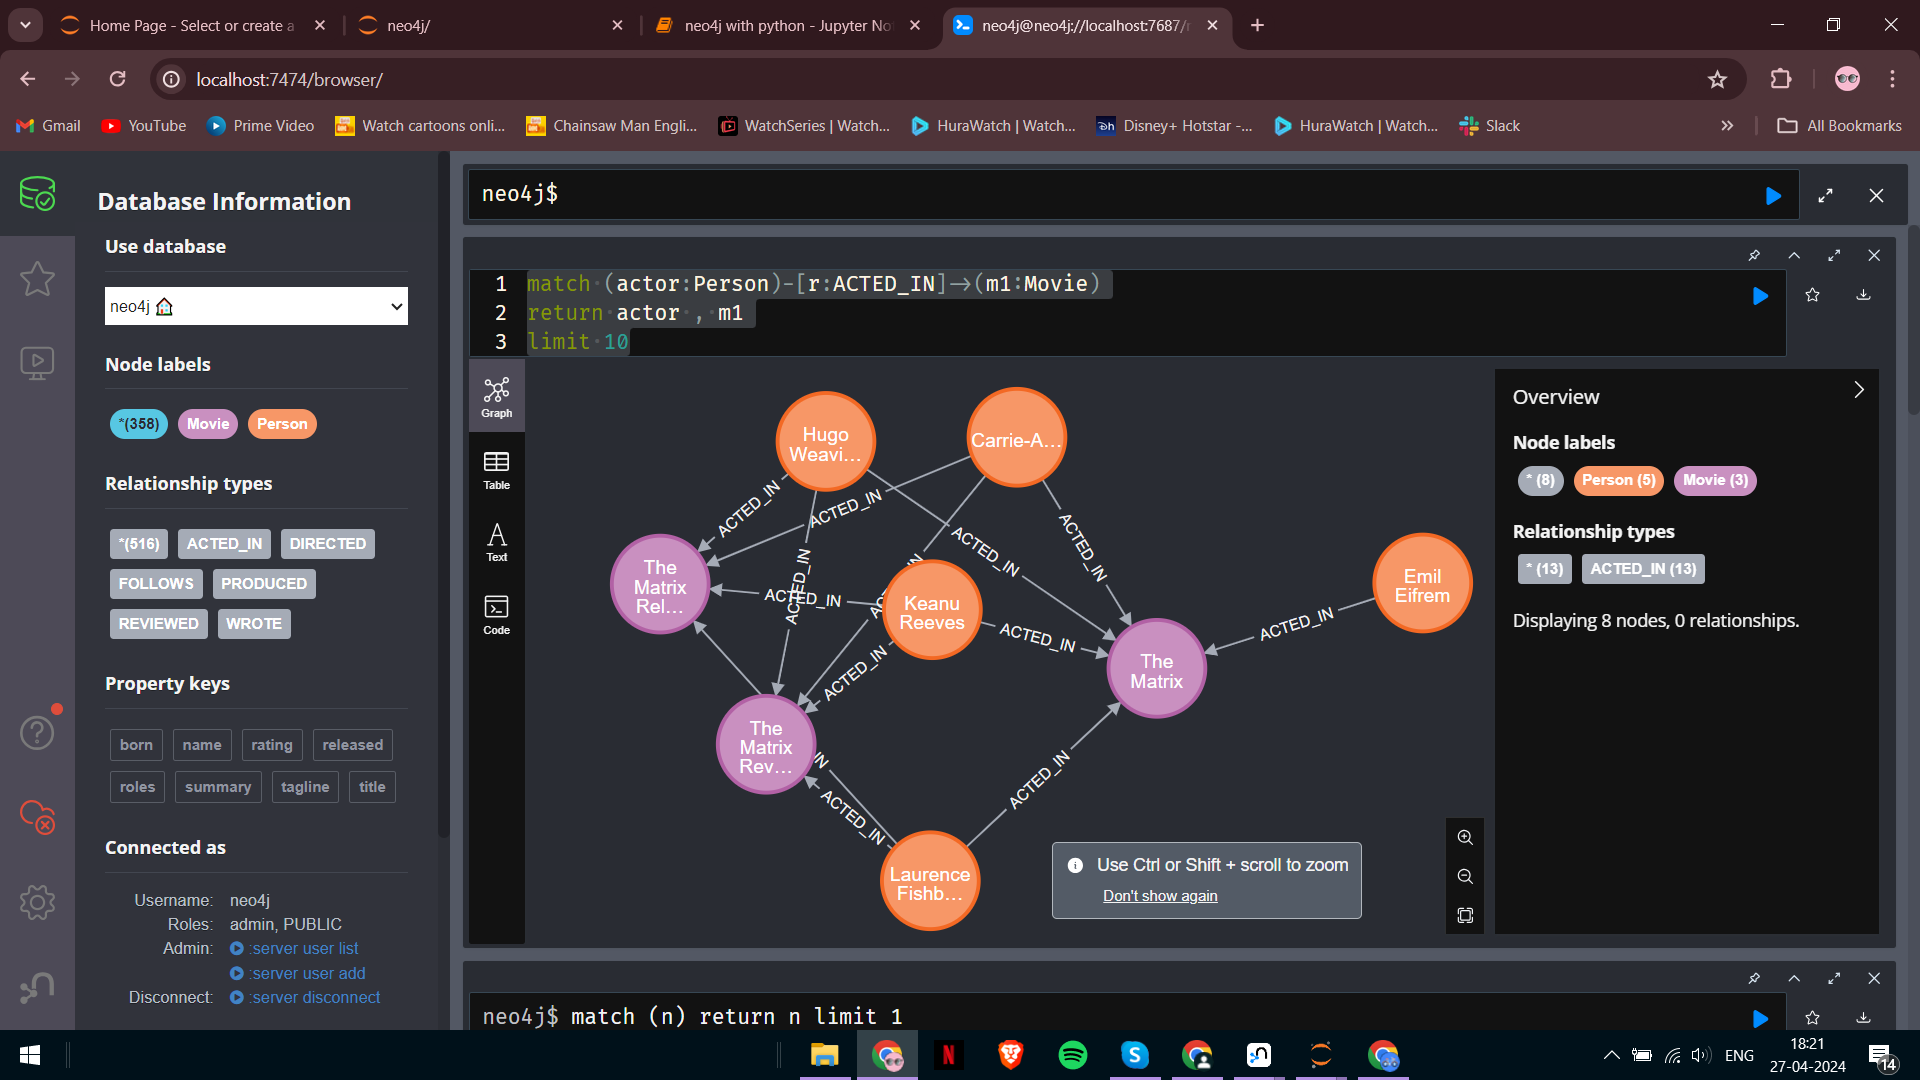


In [15]:
q4 = 'match (p1:Person)-[f1:FOLLOWS]->(p2:Person)-[f2:FOLLOWS]->(p3:Person)return p1, p2 ,p3'
q4_ans = session.run(q4)

for i in q4_ans:
    print(i)

<Record p1=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:165' labels=frozenset({'Person'}) properties={'name': 'Paul Blythe'}> p2=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:166' labels=frozenset({'Person'}) properties={'name': 'Angela Scope'}> p3=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:167' labels=frozenset({'Person'}) properties={'name': 'Jessica Thompson'}>>
<Record p1=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:344' labels=frozenset({'Person'}) properties={'name': 'Paul Blythe'}> p2=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:345' labels=frozenset({'Person'}) properties={'name': 'Angela Scope'}> p3=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:346' labels=frozenset({'Person'}) properties={'name': 'Jessica Thompson'}>>


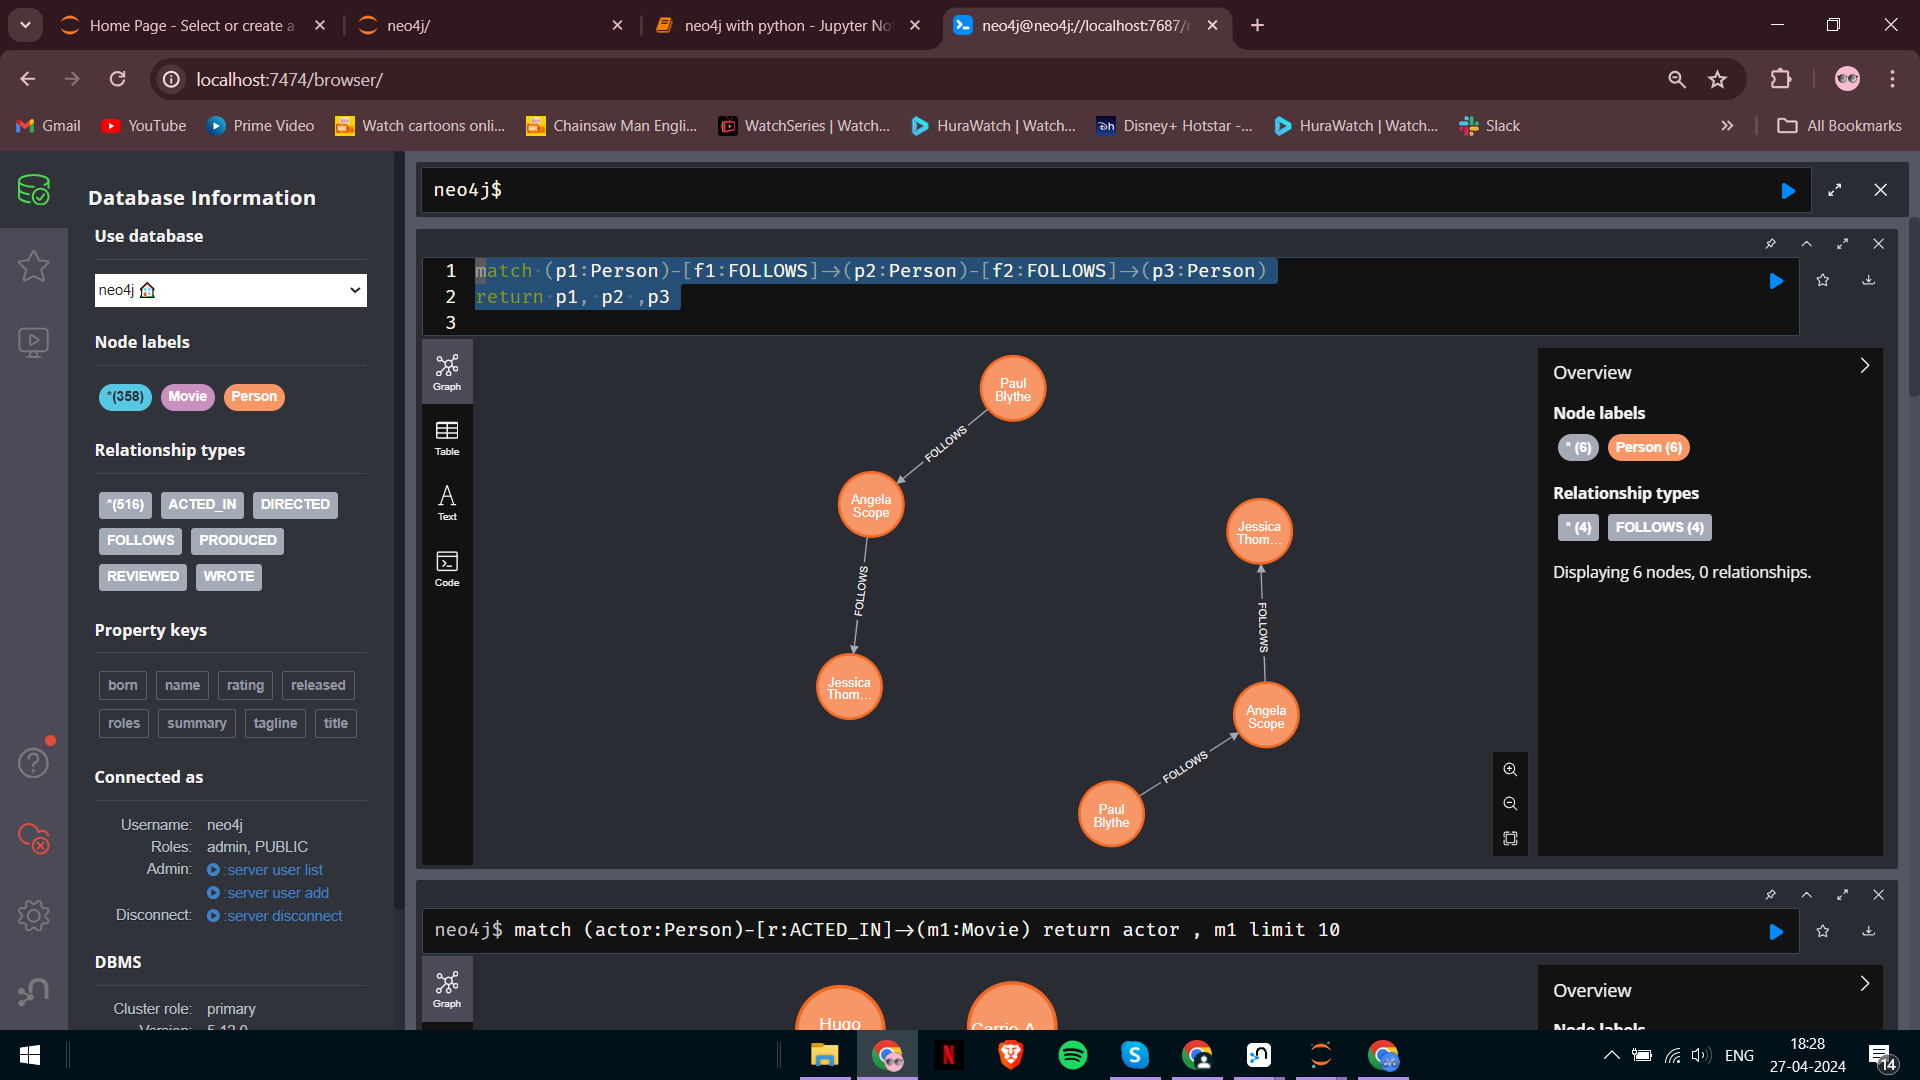

In [17]:
q5 ='''match (p1:Person)-[r1:FOLLOWS]->(p2:Person)-[r2:REVIEWED]->(m1:Movie)
return distinct p1 , p2 ,m1'''

q5_ans = session.run(q5)

for i in q5_ans:
    print(i)

<Record p1=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:168' labels=frozenset({'Person'}) properties={'name': 'James Thompson'}> p2=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:167' labels=frozenset({'Person'}) properties={'name': 'Jessica Thompson'}> m1=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:97' labels=frozenset({'Movie'}) properties={'tagline': "It's a hell of a thing, killing a man", 'title': 'Unforgiven', 'released': 1992}>>
<Record p1=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:168' labels=frozenset({'Person'}) properties={'name': 'James Thompson'}> p2=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:167' labels=frozenset({'Person'}) properties={'name': 'Jessica Thompson'}> m1=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:95' labels=frozenset({'Movie'}) properties={'tagline': 'Come as you are', 'title': 'The Birdcage', 'released': 1996}>>
<Record p1=<Node element_id='4:836eba2e-c7e4-4878-a146-2d29ce37ab55:16

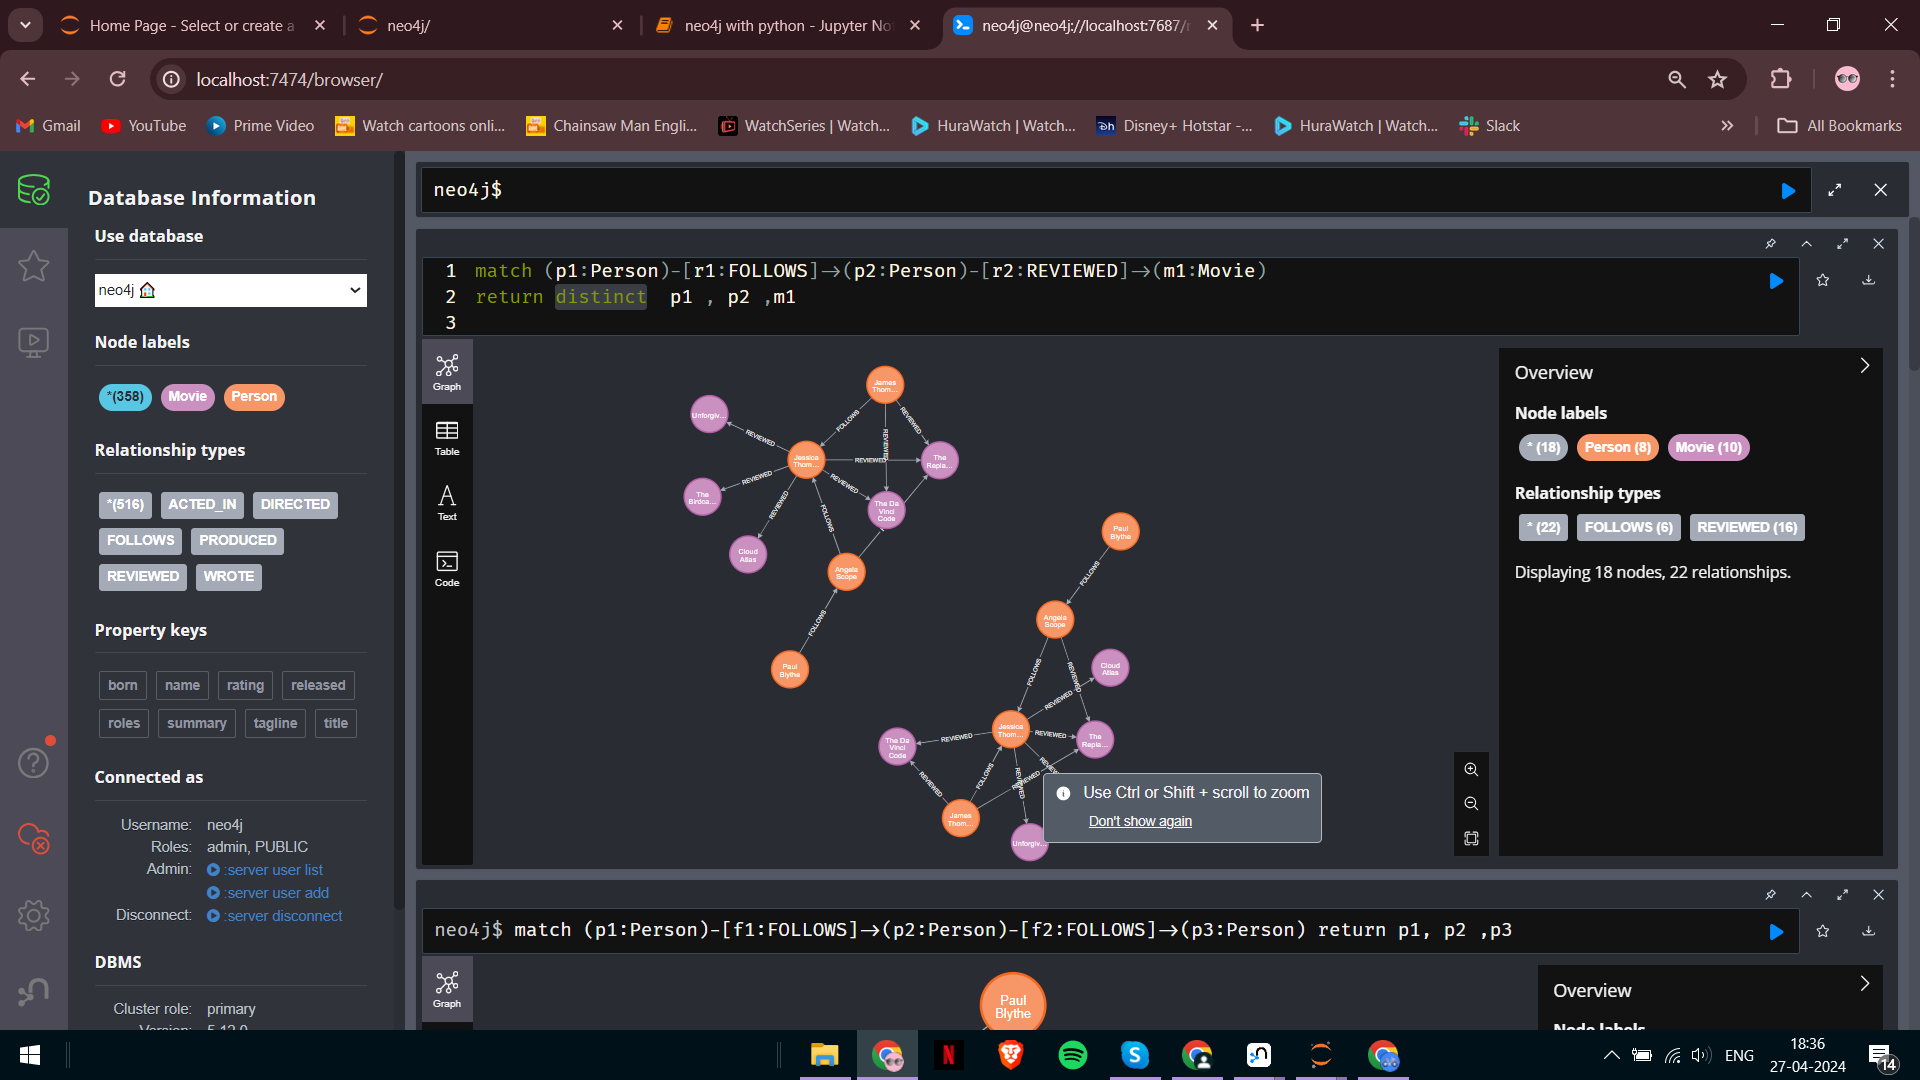

In [19]:
q6 ='''match (p1:Person)-[r1:ACTED_IN]->(m1:Movie)
where p1.name = 'Tom Hanks'
return distinct p1.name , m1.title'''

q6_ans = session.run(q6)

for i in q6_ans:
    print(i)

<Record p1.name='Tom Hanks' m1.title="You've Got Mail">
<Record p1.name='Tom Hanks' m1.title='Apollo 13'>
<Record p1.name='Tom Hanks' m1.title='Joe Versus the Volcano'>
<Record p1.name='Tom Hanks' m1.title='That Thing You Do'>
<Record p1.name='Tom Hanks' m1.title='Cloud Atlas'>
<Record p1.name='Tom Hanks' m1.title='The Da Vinci Code'>
<Record p1.name='Tom Hanks' m1.title='Sleepless in Seattle'>
<Record p1.name='Tom Hanks' m1.title='A League of Their Own'>
<Record p1.name='Tom Hanks' m1.title='The Green Mile'>
<Record p1.name='Tom Hanks' m1.title="Charlie Wilson's War">
<Record p1.name='Tom Hanks' m1.title='Cast Away'>
<Record p1.name='Tom Hanks' m1.title='The Polar Express'>


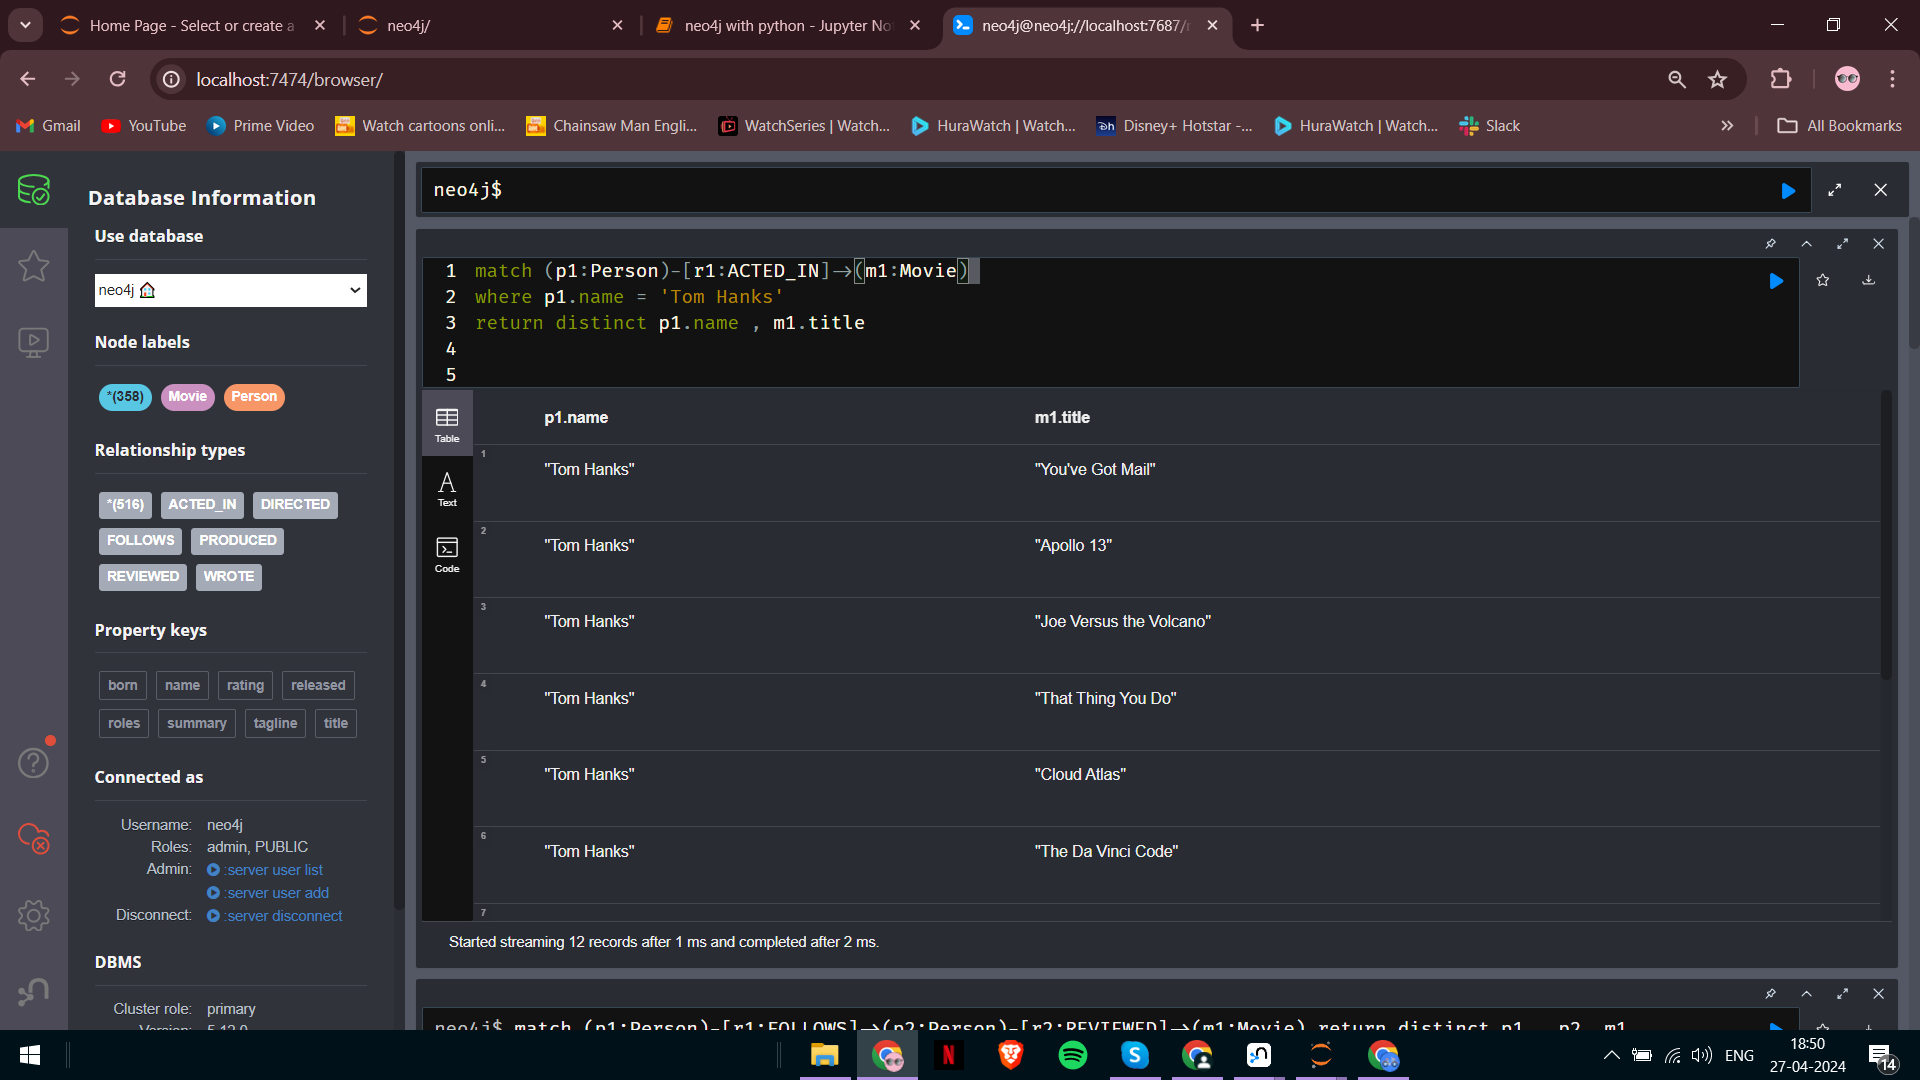

In [20]:
q7 ='''match (p1:Person)-[r1:ACTED_IN]->(m1:Movie)
where p1.born >=1960
return distinct p1.name , m1.title'''

q7_ans = session.run(q7)

for i in q7_ans:
    print(i)

<Record p1.name='Keanu Reeves' m1.title='The Replacements'>
<Record p1.name='Keanu Reeves' m1.title='Johnny Mnemonic'>
<Record p1.name='Keanu Reeves' m1.title="Something's Gotta Give">
<Record p1.name='Keanu Reeves' m1.title="The Devil's Advocate">
<Record p1.name='Keanu Reeves' m1.title='The Matrix Revolutions'>
<Record p1.name='Keanu Reeves' m1.title='The Matrix Reloaded'>
<Record p1.name='Keanu Reeves' m1.title='The Matrix'>
<Record p1.name='Carrie-Anne Moss' m1.title='The Matrix Revolutions'>
<Record p1.name='Carrie-Anne Moss' m1.title='The Matrix Reloaded'>
<Record p1.name='Carrie-Anne Moss' m1.title='The Matrix'>
<Record p1.name='Laurence Fishburne' m1.title='The Matrix Revolutions'>
<Record p1.name='Laurence Fishburne' m1.title='The Matrix Reloaded'>
<Record p1.name='Laurence Fishburne' m1.title='The Matrix'>
<Record p1.name='Hugo Weaving' m1.title='Cloud Atlas'>
<Record p1.name='Hugo Weaving' m1.title='V for Vendetta'>
<Record p1.name='Hugo Weaving' m1.title='The Matrix Revolut

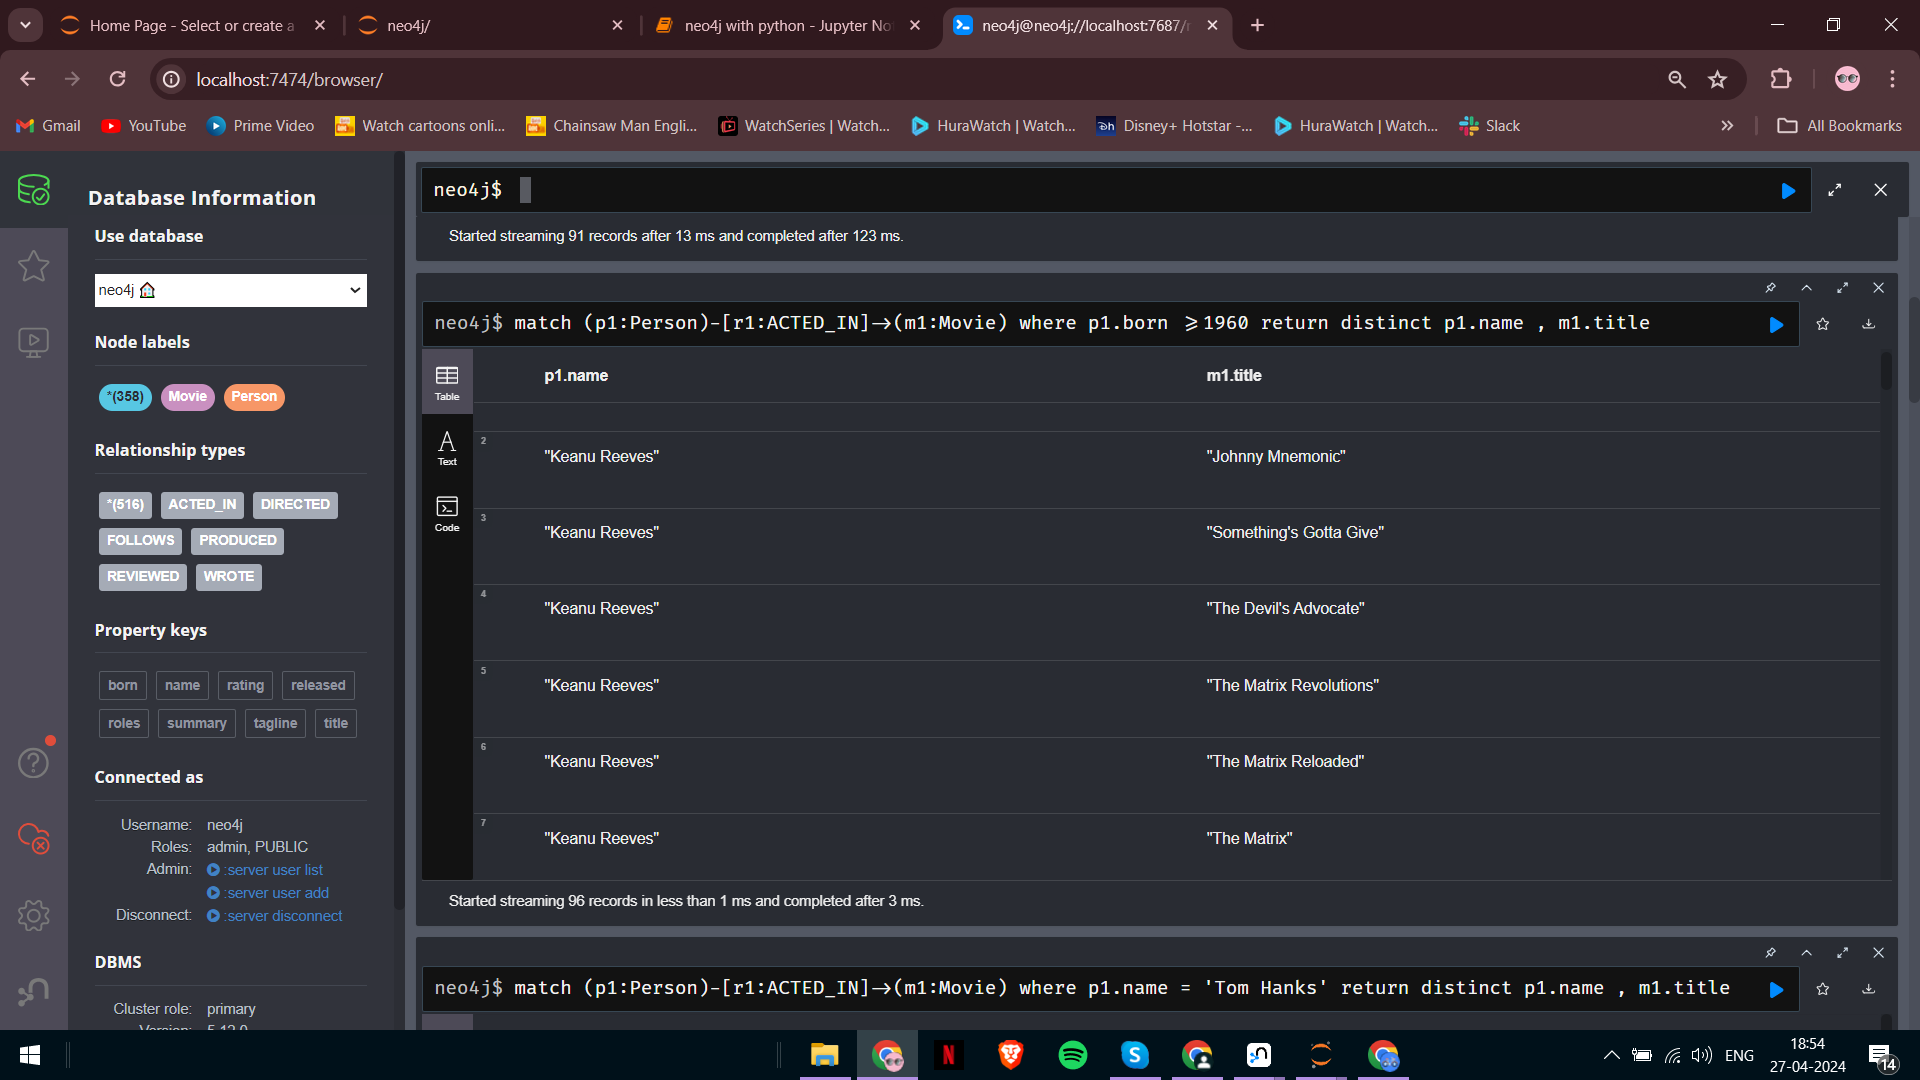

In [21]:
q8 ='''match (p1:Person)-[r1:ACTED_IN]->(m1:Movie)
where p1.born >=1960 And p1.born<=1980
return distinct p1.name , m1.title'''

q8_ans = session.run(q8)

for i in q8_ans:
    print(i)

<Record p1.name='Keanu Reeves' m1.title='The Replacements'>
<Record p1.name='Keanu Reeves' m1.title='Johnny Mnemonic'>
<Record p1.name='Keanu Reeves' m1.title="Something's Gotta Give">
<Record p1.name='Keanu Reeves' m1.title="The Devil's Advocate">
<Record p1.name='Keanu Reeves' m1.title='The Matrix Revolutions'>
<Record p1.name='Keanu Reeves' m1.title='The Matrix Reloaded'>
<Record p1.name='Keanu Reeves' m1.title='The Matrix'>
<Record p1.name='Carrie-Anne Moss' m1.title='The Matrix Revolutions'>
<Record p1.name='Carrie-Anne Moss' m1.title='The Matrix Reloaded'>
<Record p1.name='Carrie-Anne Moss' m1.title='The Matrix'>
<Record p1.name='Laurence Fishburne' m1.title='The Matrix Revolutions'>
<Record p1.name='Laurence Fishburne' m1.title='The Matrix Reloaded'>
<Record p1.name='Laurence Fishburne' m1.title='The Matrix'>
<Record p1.name='Hugo Weaving' m1.title='Cloud Atlas'>
<Record p1.name='Hugo Weaving' m1.title='V for Vendetta'>
<Record p1.name='Hugo Weaving' m1.title='The Matrix Revolut

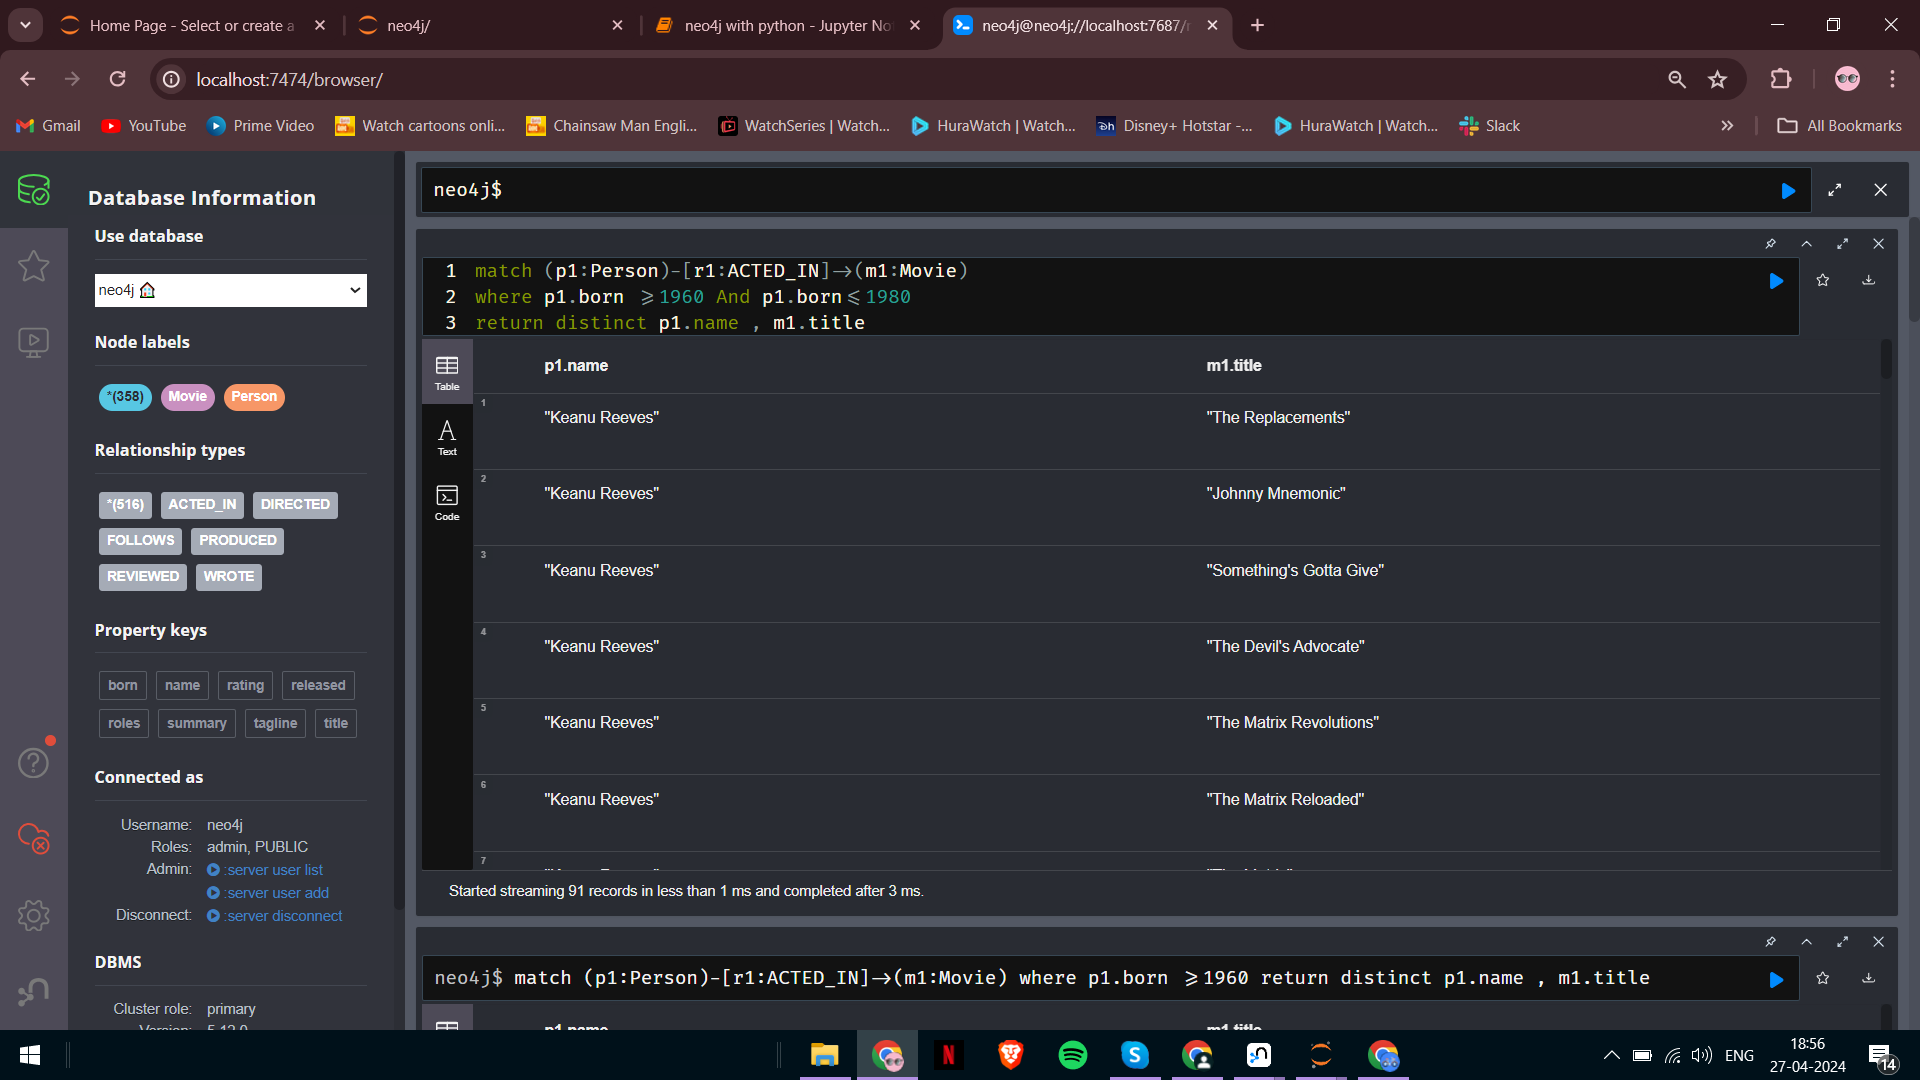

In [22]:
q9 ='''match (m1:Movie)
where m1.title =~ 'The.*'
return m1.title'''

q9_ans = session.run(q9)

for i in q9_ans:
    print(i)

<Record m1.title='The Matrix'>
<Record m1.title='The Matrix Reloaded'>
<Record m1.title='The Matrix Revolutions'>
<Record m1.title="The Devil's Advocate">
<Record m1.title='The Replacements'>
<Record m1.title='The Birdcage'>
<Record m1.title='The Da Vinci Code'>
<Record m1.title='The Green Mile'>
<Record m1.title='The Polar Express'>
<Record m1.title='The Matrix'>
<Record m1.title='The Matrix Reloaded'>
<Record m1.title='The Matrix Revolutions'>
<Record m1.title="The Devil's Advocate">
<Record m1.title='The Replacements'>
<Record m1.title='The Birdcage'>
<Record m1.title='The Da Vinci Code'>
<Record m1.title='The Green Mile'>
<Record m1.title='The Polar Express'>


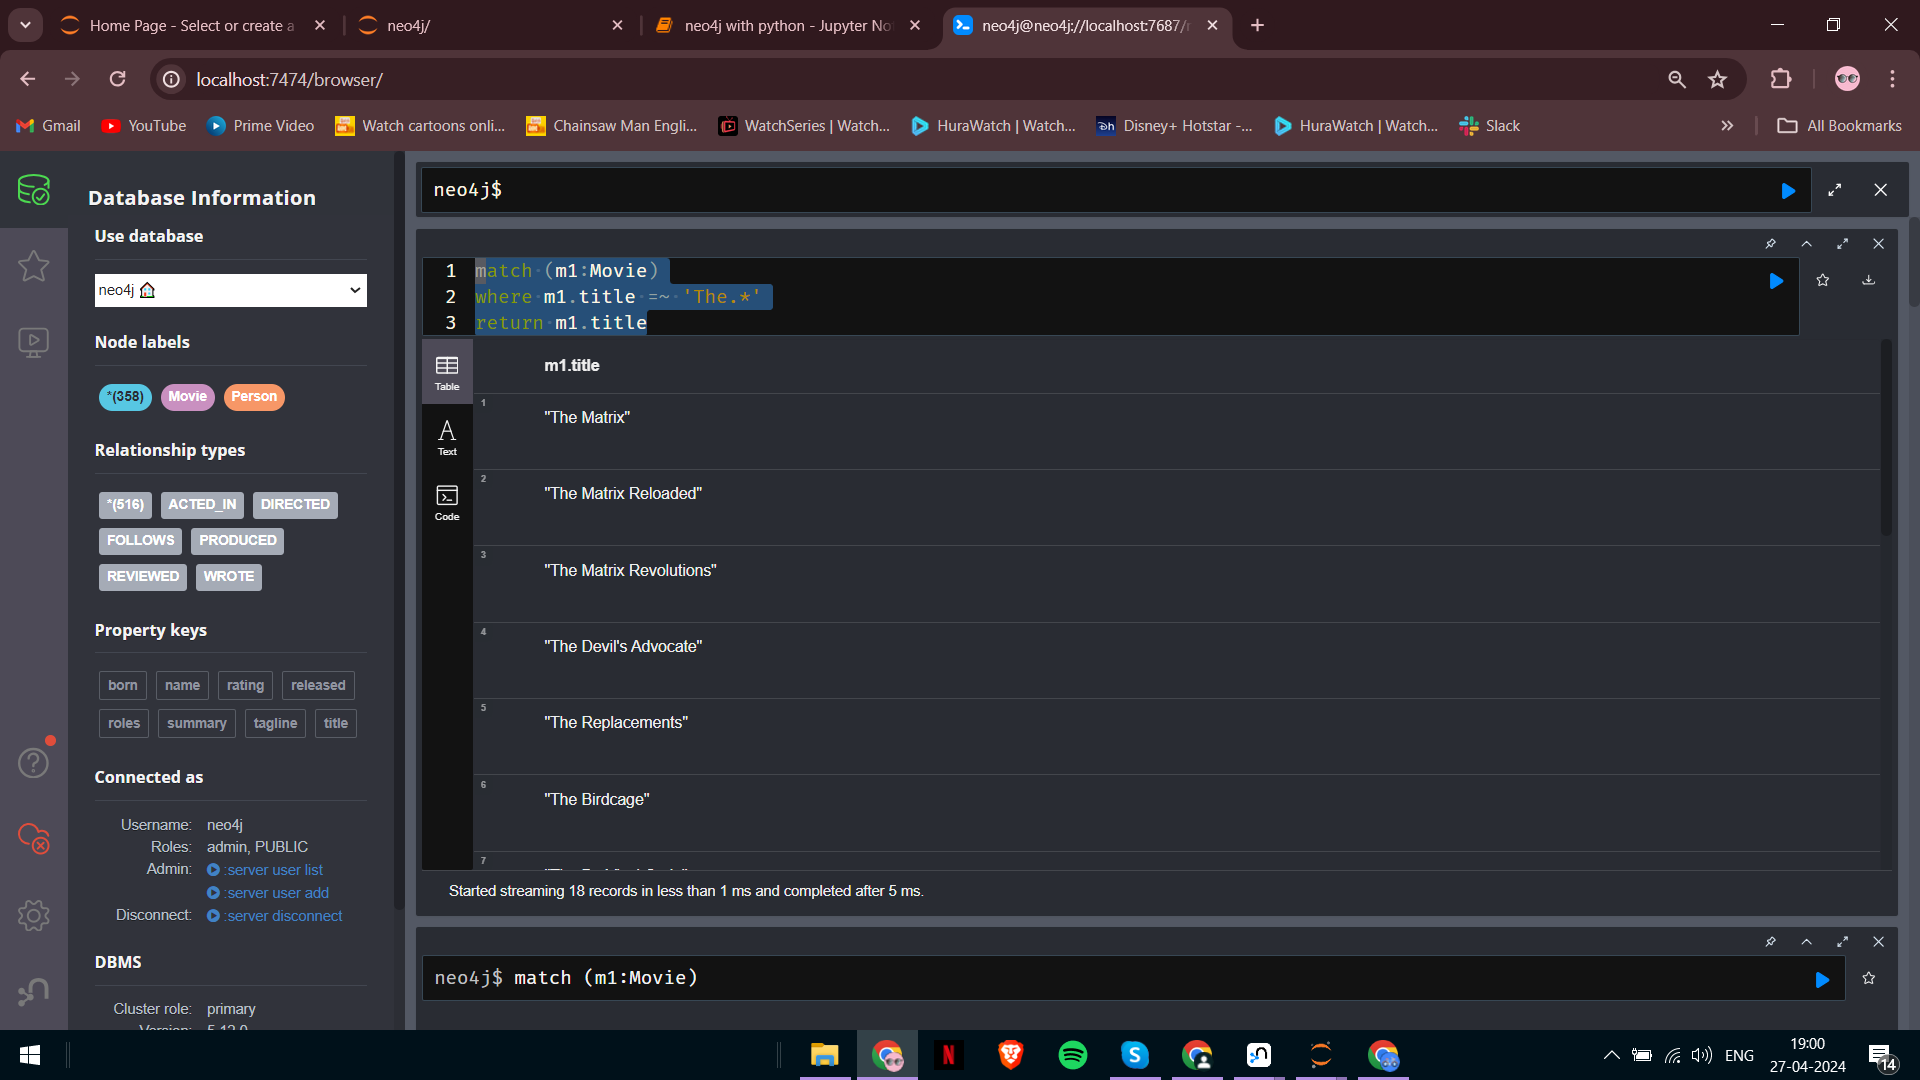

In [24]:
q10 = '''match (m1:Movie)
return distinct m1.title as MovieTitle 
order by m1.title DESC'''

q10_ans = session.run(q10)

for i in q10_ans:
    print(i)

<Record MovieTitle="You've Got Mail">
<Record MovieTitle='When Harry Met Sally'>
<Record MovieTitle='What Dreams May Come'>
<Record MovieTitle='V for Vendetta'>
<Record MovieTitle='Unforgiven'>
<Record MovieTitle='Twister'>
<Record MovieTitle='Top Gun'>
<Record MovieTitle='The Replacements'>
<Record MovieTitle='The Polar Express'>
<Record MovieTitle='The Matrix Revolutions'>
<Record MovieTitle='The Matrix Reloaded'>
<Record MovieTitle='The Matrix'>
<Record MovieTitle='The Green Mile'>
<Record MovieTitle="The Devil's Advocate">
<Record MovieTitle='The Da Vinci Code'>
<Record MovieTitle='The Birdcage'>
<Record MovieTitle='That Thing You Do'>
<Record MovieTitle='Stand By Me'>
<Record MovieTitle='Speed Racer'>
<Record MovieTitle="Something's Gotta Give">
<Record MovieTitle='Snow Falling on Cedars'>
<Record MovieTitle='Sleepless in Seattle'>
<Record MovieTitle='RescueDawn'>
<Record MovieTitle='Parasite'>
<Record MovieTitle="One Flew Over the Cuckoo's Nest">
<Record MovieTitle='Ninja Assassi

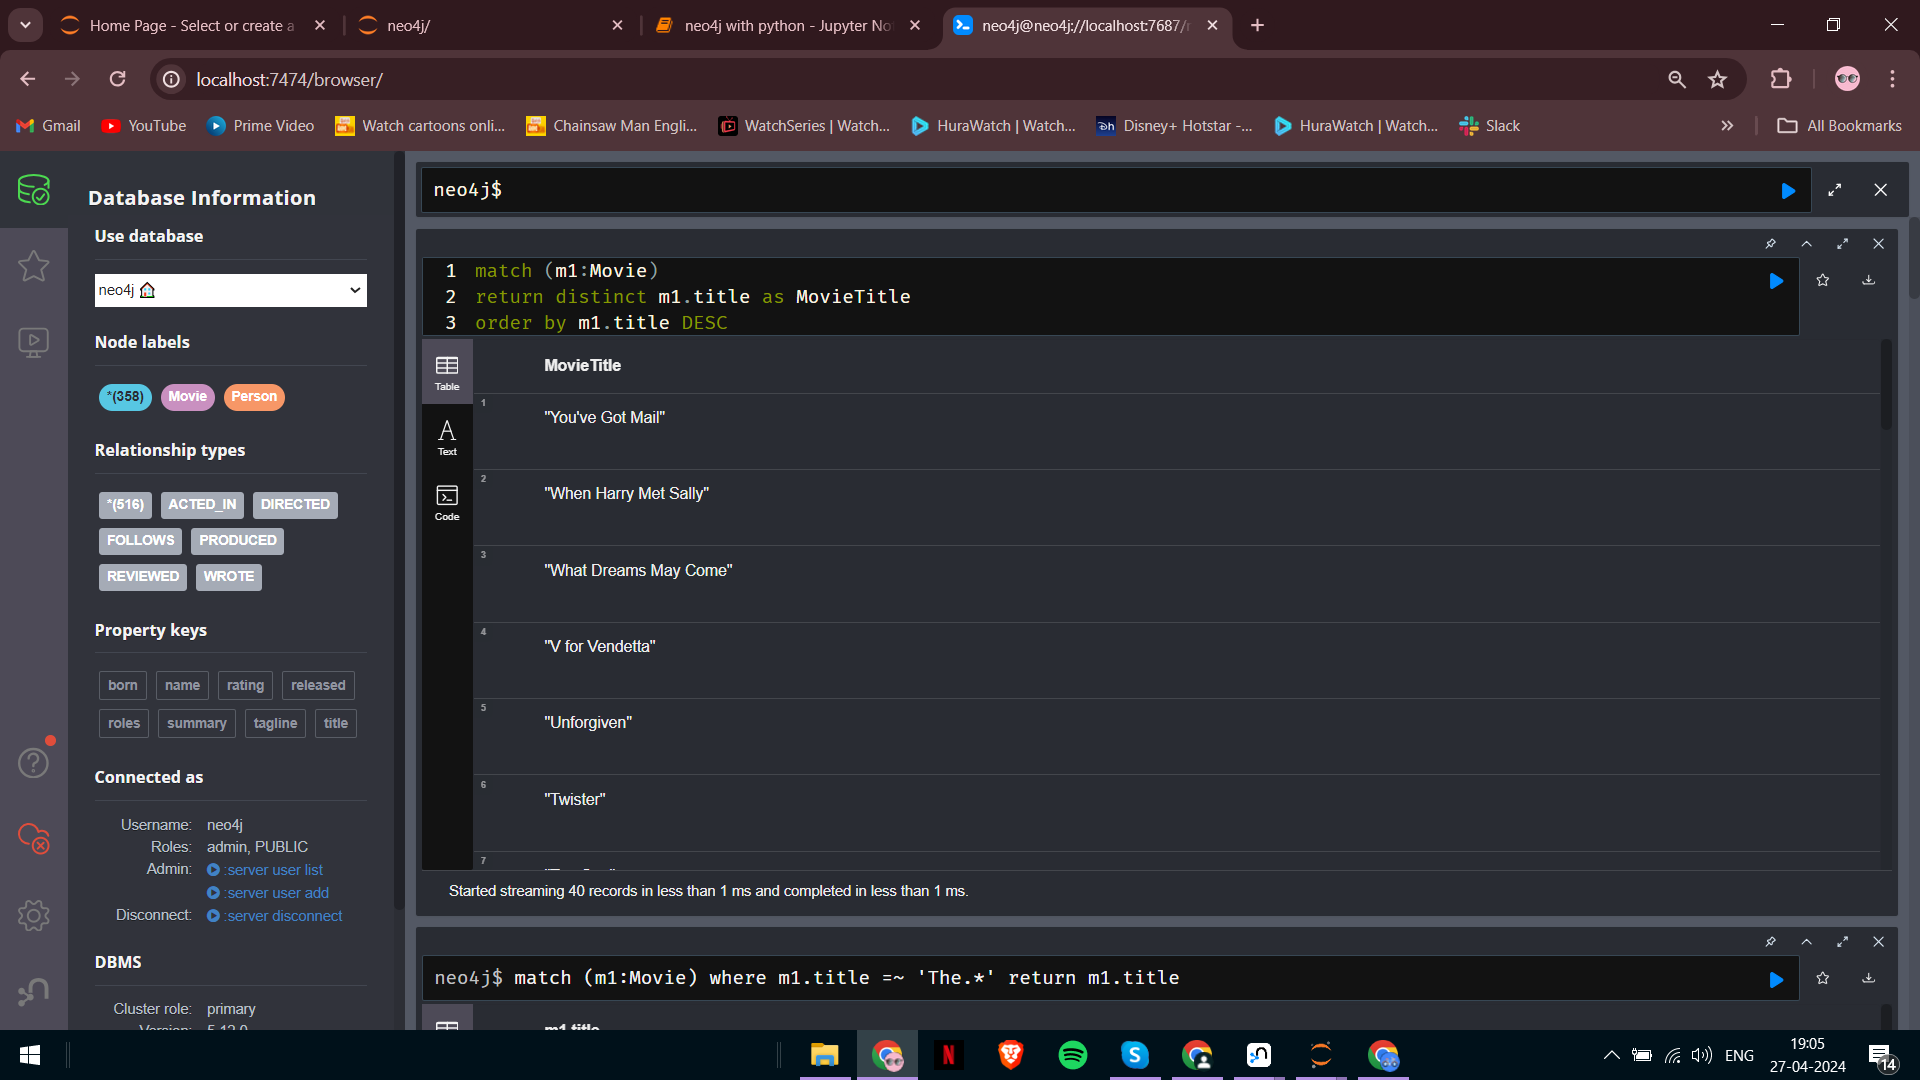

In [28]:
q11 = 'return abs(0.9) , floor(0.9) , ceil(0.9) , round(0.9)'

q11_ans = session.run(q11)

for i in q11_ans:
    print(i)

<Record abs(0.9)=0.9 floor(0.9)=0.0 ceil(0.9)=1.0 round(0.9)=1.0>


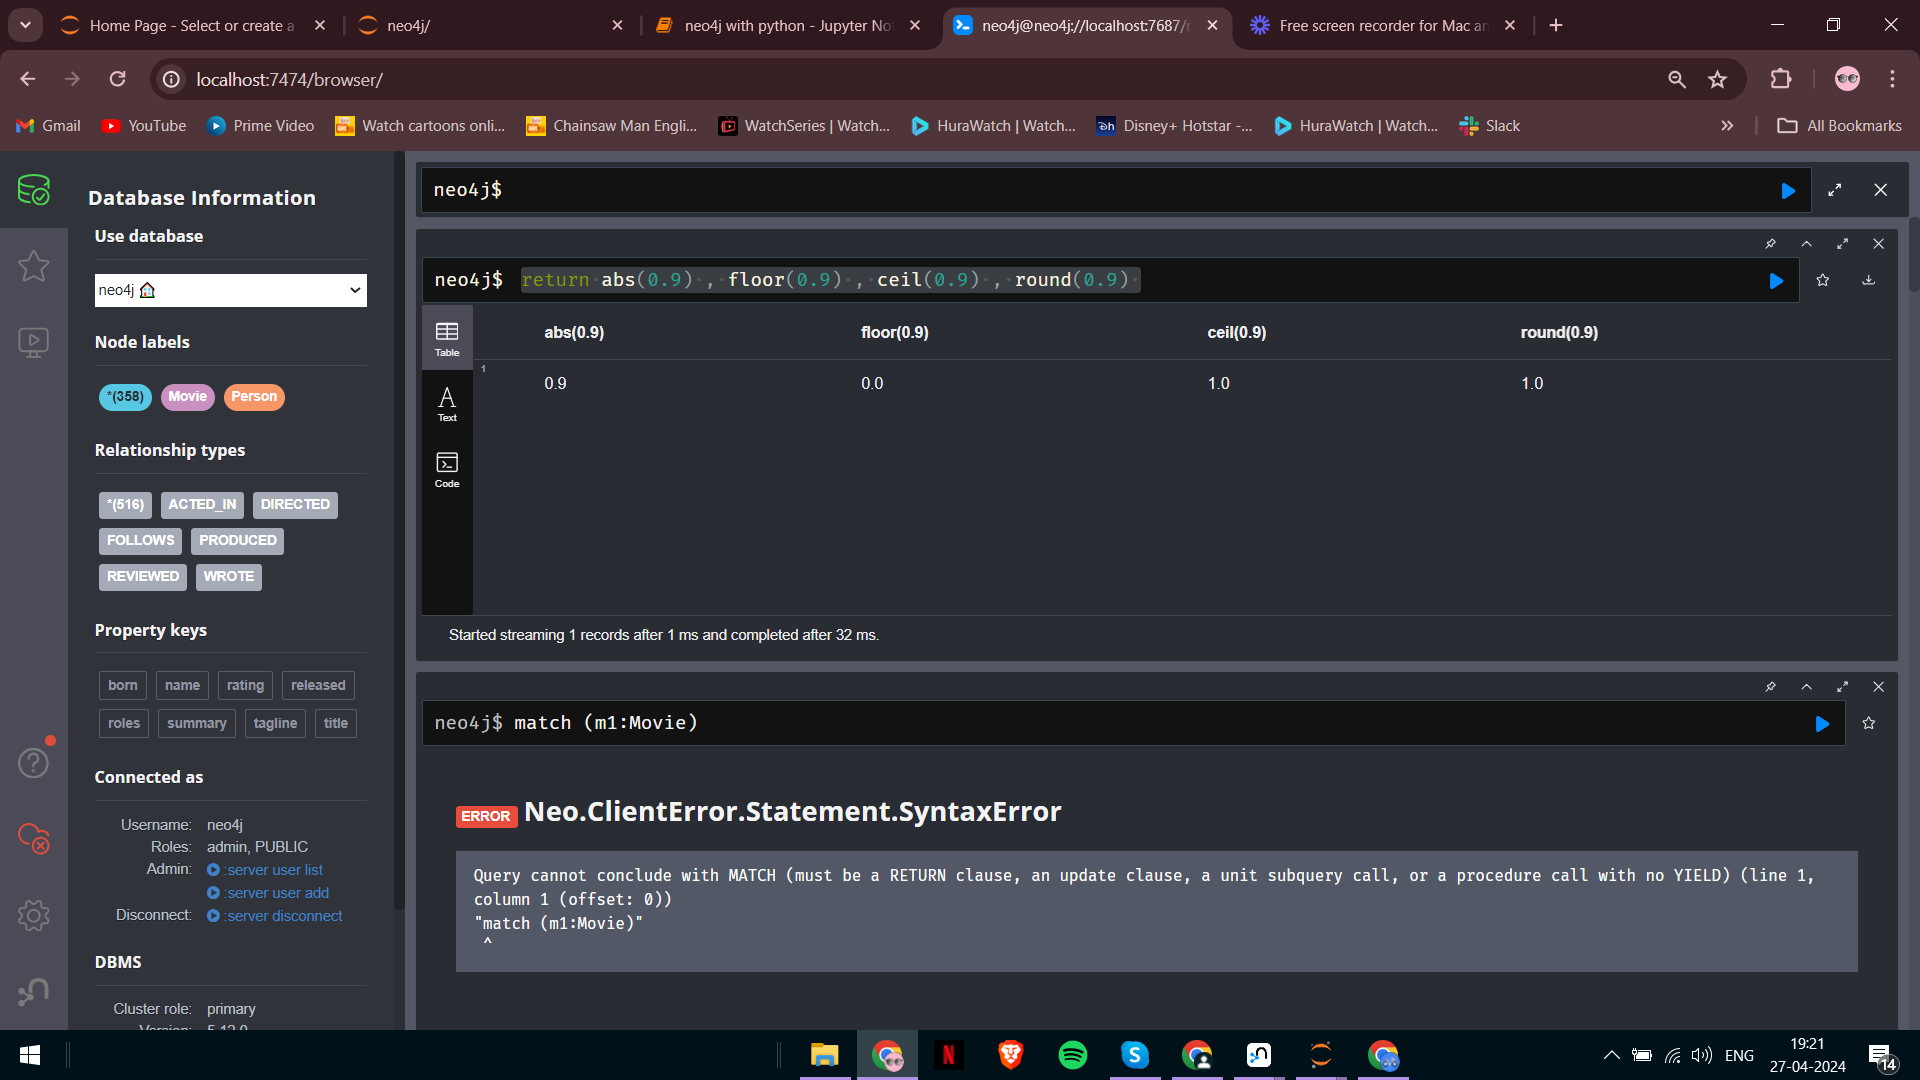